In [1]:
#This is to create the best turbidity model and save it


In [2]:
import numpy as np
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split, KFold
from sklearn.metrics import mean_squared_error


import tensorflow.keras as keras


In [3]:
df = pd.read_csv(os.path.join("data", "final_df_big.csv"))

In [4]:
df.columns


Index(['Date', 'pH', 'Temperature (°C)', 'D.O. (mg/L)', 'Turbidity (NTU)',
       'NO3-N (mg/L)', 'NH4-N (mg/L)', 'ORP (MV)', 'Conductivity (mS/cm)'],
      dtype='object')

In [5]:
df_no_date = df.drop(columns=['Date'])
df_no_date['extra'] = 1

x_arr = np.array(df_no_date.drop(columns=['Turbidity (NTU)']), np.float32)
x_shaped = x_arr.reshape(x_arr.shape[0], 1, x_arr.shape[1])

y_shaped = df_no_date['Turbidity (NTU)'].values

kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(x_shaped)

print(kf)


KFold(n_splits=5, random_state=None, shuffle=True)


In [6]:
model = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[None, x_shaped.shape[2]]),
    keras.layers.GRU(144, return_sequences=True, activation='relu'),
    keras.layers.Reshape(target_shape=(12,12)),
    keras.layers.Conv1D(filters=128, kernel_size=4, strides=1, padding='same',activation='relu'),
    keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    keras.layers.MaxPooling1D((2), strides=None),
    keras.layers.AveragePooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8, ),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 100)         33000     
                                                                 
 gru_1 (GRU)                 (None, None, 144)         106272    
                                                                 
 reshape (Reshape)           (None, 12, 12)            0         
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           6272      
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            32832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                        

In [7]:

cb = [keras.callbacks.ModelCheckpoint("best_model", monitor='loss', save_best_only=True), keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True, monitor='loss')]

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00010),  
              loss='mse',
              metrics=keras.metrics.RootMeanSquaredError()
        )

In [8]:
models = []
histories = []  
model_evals = []
for train_index, test_index in kf.split(x_shaped):
    x_train, x_test = x_shaped[train_index], x_shaped[test_index]
    y_train, y_test = y_shaped[train_index], y_shaped[test_index]
    

    history = model.fit(x_train,y_train,epochs=200, callbacks=cb)
    
    model_eval = model.evaluate(x_test, y_test)
    models.append(model)
    histories.append(history)
    model_evals.append(model_eval)
        

Epoch 1/200
1088/1098 [============================>.] - ETA: 0s - loss: 1852.3087 - root_mean_squared_error: 43.0385

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 8ms/step - loss: 1841.2828 - root_mean_squared_error: 42.9102
Epoch 2/200
1097/1098 [============================>.] - ETA: 0s - loss: 639.3109 - root_mean_squared_error: 25.2846

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 639.3718 - root_mean_squared_error: 25.2858
Epoch 3/200
1089/1098 [============================>.] - ETA: 0s - loss: 556.8022 - root_mean_squared_error: 23.5967

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 556.6250 - root_mean_squared_error: 23.5929
Epoch 4/200
1089/1098 [============================>.] - ETA: 0s - loss: 493.2594 - root_mean_squared_error: 22.2094

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 493.5403 - root_mean_squared_error: 22.2158
Epoch 5/200
1088/1098 [============================>.] - ETA: 0s - loss: 443.6135 - root_mean_squared_error: 21.0621

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 443.2837 - root_mean_squared_error: 21.0543
Epoch 6/200
1093/1098 [============================>.] - ETA: 0s - loss: 398.0368 - root_mean_squared_error: 19.9509

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 397.8090 - root_mean_squared_error: 19.9451
Epoch 7/200
1095/1098 [============================>.] - ETA: 0s - loss: 360.0895 - root_mean_squared_error: 18.9760

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 359.9270 - root_mean_squared_error: 18.9717
Epoch 8/200
1093/1098 [============================>.] - ETA: 0s - loss: 329.0058 - root_mean_squared_error: 18.1385

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 328.6328 - root_mean_squared_error: 18.1282
Epoch 9/200
1095/1098 [============================>.] - ETA: 0s - loss: 303.3896 - root_mean_squared_error: 17.4181

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 303.2422 - root_mean_squared_error: 17.4138
Epoch 10/200
1093/1098 [============================>.] - ETA: 0s - loss: 282.0869 - root_mean_squared_error: 16.7954

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 282.2213 - root_mean_squared_error: 16.7994
Epoch 11/200
1097/1098 [============================>.] - ETA: 0s - loss: 266.3298 - root_mean_squared_error: 16.3196

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 266.3354 - root_mean_squared_error: 16.3198
Epoch 12/200
1089/1098 [============================>.] - ETA: 0s - loss: 253.2637 - root_mean_squared_error: 15.9143

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 253.5072 - root_mean_squared_error: 15.9219
Epoch 13/200
1097/1098 [============================>.] - ETA: 0s - loss: 242.3488 - root_mean_squared_error: 15.5676

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 242.3467 - root_mean_squared_error: 15.5675
Epoch 14/200
1090/1098 [============================>.] - ETA: 0s - loss: 233.2951 - root_mean_squared_error: 15.2740

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 233.0669 - root_mean_squared_error: 15.2665
Epoch 15/200
1093/1098 [============================>.] - ETA: 0s - loss: 223.7338 - root_mean_squared_error: 14.9577

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 223.6610 - root_mean_squared_error: 14.9553
Epoch 16/200
1095/1098 [============================>.] - ETA: 0s - loss: 214.8308 - root_mean_squared_error: 14.6571

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 215.0333 - root_mean_squared_error: 14.6640
Epoch 17/200
1095/1098 [============================>.] - ETA: 0s - loss: 207.1279 - root_mean_squared_error: 14.3919

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 207.0637 - root_mean_squared_error: 14.3897
Epoch 18/200
1097/1098 [============================>.] - ETA: 0s - loss: 199.2695 - root_mean_squared_error: 14.1163

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 199.2320 - root_mean_squared_error: 14.1150
Epoch 19/200
1089/1098 [============================>.] - ETA: 0s - loss: 192.9078 - root_mean_squared_error: 13.8891

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 193.1058 - root_mean_squared_error: 13.8963
Epoch 20/200
1096/1098 [============================>.] - ETA: 0s - loss: 187.1191 - root_mean_squared_error: 13.6791

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 187.0219 - root_mean_squared_error: 13.6756
Epoch 21/200
1096/1098 [============================>.] - ETA: 0s - loss: 181.4781 - root_mean_squared_error: 13.4714

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 181.5451 - root_mean_squared_error: 13.4739
Epoch 22/200
1095/1098 [============================>.] - ETA: 0s - loss: 176.8638 - root_mean_squared_error: 13.2990

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 176.9334 - root_mean_squared_error: 13.3016
Epoch 23/200
1093/1098 [============================>.] - ETA: 0s - loss: 172.4378 - root_mean_squared_error: 13.1316

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 172.3780 - root_mean_squared_error: 13.1293
Epoch 24/200
1095/1098 [============================>.] - ETA: 0s - loss: 168.6280 - root_mean_squared_error: 12.9857

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 168.6075 - root_mean_squared_error: 12.9849
Epoch 25/200
1097/1098 [============================>.] - ETA: 0s - loss: 164.7685 - root_mean_squared_error: 12.8362

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 164.7153 - root_mean_squared_error: 12.8341
Epoch 26/200
1089/1098 [============================>.] - ETA: 0s - loss: 161.4841 - root_mean_squared_error: 12.7076

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 161.4619 - root_mean_squared_error: 12.7068
Epoch 27/200
1094/1098 [============================>.] - ETA: 0s - loss: 158.0059 - root_mean_squared_error: 12.5700

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 157.9359 - root_mean_squared_error: 12.5673
Epoch 28/200
1098/1098 [==============================] - ETA: 0s - loss: 154.7684 - root_mean_squared_error: 12.4406

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 154.7684 - root_mean_squared_error: 12.4406
Epoch 29/200
1093/1098 [============================>.] - ETA: 0s - loss: 151.7911 - root_mean_squared_error: 12.3204

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 151.8137 - root_mean_squared_error: 12.3213
Epoch 30/200
1095/1098 [============================>.] - ETA: 0s - loss: 149.5468 - root_mean_squared_error: 12.2289

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 149.5854 - root_mean_squared_error: 12.2305
Epoch 31/200
1089/1098 [============================>.] - ETA: 0s - loss: 146.2657 - root_mean_squared_error: 12.0940

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 146.4028 - root_mean_squared_error: 12.0997
Epoch 32/200
1090/1098 [============================>.] - ETA: 0s - loss: 144.7464 - root_mean_squared_error: 12.0311

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 144.6104 - root_mean_squared_error: 12.0254
Epoch 33/200
1095/1098 [============================>.] - ETA: 0s - loss: 142.5582 - root_mean_squared_error: 11.9398

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 10ms/step - loss: 142.4657 - root_mean_squared_error: 11.9359
Epoch 34/200
1090/1098 [============================>.] - ETA: 0s - loss: 140.6694 - root_mean_squared_error: 11.8604

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 140.4565 - root_mean_squared_error: 11.8514
Epoch 35/200
1091/1098 [============================>.] - ETA: 0s - loss: 138.6052 - root_mean_squared_error: 11.7731

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 138.8492 - root_mean_squared_error: 11.7834
Epoch 36/200
1095/1098 [============================>.] - ETA: 0s - loss: 136.9900 - root_mean_squared_error: 11.7043

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 137.0631 - root_mean_squared_error: 11.7074
Epoch 37/200
1098/1098 [==============================] - ETA: 0s - loss: 134.5747 - root_mean_squared_error: 11.6006

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 134.5747 - root_mean_squared_error: 11.6006
Epoch 38/200
1096/1098 [============================>.] - ETA: 0s - loss: 133.6704 - root_mean_squared_error: 11.5616

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 133.6968 - root_mean_squared_error: 11.5627
Epoch 39/200
1091/1098 [============================>.] - ETA: 0s - loss: 130.6854 - root_mean_squared_error: 11.4318

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 130.6591 - root_mean_squared_error: 11.4306
Epoch 40/200
1094/1098 [============================>.] - ETA: 0s - loss: 129.6827 - root_mean_squared_error: 11.3878

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 129.5652 - root_mean_squared_error: 11.3827
Epoch 41/200
1090/1098 [============================>.] - ETA: 0s - loss: 128.3448 - root_mean_squared_error: 11.3289

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 128.2876 - root_mean_squared_error: 11.3264
Epoch 42/200
1093/1098 [============================>.] - ETA: 0s - loss: 127.1739 - root_mean_squared_error: 11.2771

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 127.1411 - root_mean_squared_error: 11.2757
Epoch 43/200
1090/1098 [============================>.] - ETA: 0s - loss: 125.3241 - root_mean_squared_error: 11.1948

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 125.4279 - root_mean_squared_error: 11.1995
Epoch 44/200
1097/1098 [============================>.] - ETA: 0s - loss: 123.1036 - root_mean_squared_error: 11.0952

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 123.0720 - root_mean_squared_error: 11.0938
Epoch 45/200
1094/1098 [============================>.] - ETA: 0s - loss: 122.4669 - root_mean_squared_error: 11.0665

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 122.3784 - root_mean_squared_error: 11.0625
Epoch 46/200
1097/1098 [============================>.] - ETA: 0s - loss: 121.1786 - root_mean_squared_error: 11.0081

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 121.2193 - root_mean_squared_error: 11.0100
Epoch 47/200
1092/1098 [============================>.] - ETA: 0s - loss: 120.1111 - root_mean_squared_error: 10.9595

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 120.0791 - root_mean_squared_error: 10.9581
Epoch 48/200
1093/1098 [============================>.] - ETA: 0s - loss: 118.5663 - root_mean_squared_error: 10.8888

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 118.6312 - root_mean_squared_error: 10.8918
Epoch 49/200
1092/1098 [============================>.] - ETA: 0s - loss: 117.4045 - root_mean_squared_error: 10.8353

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 117.2917 - root_mean_squared_error: 10.8301
Epoch 50/200
1089/1098 [============================>.] - ETA: 0s - loss: 116.0705 - root_mean_squared_error: 10.7736

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 115.7655 - root_mean_squared_error: 10.7594
Epoch 51/200
1093/1098 [============================>.] - ETA: 0s - loss: 115.1617 - root_mean_squared_error: 10.7313

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 115.1624 - root_mean_squared_error: 10.7314
Epoch 52/200
1097/1098 [============================>.] - ETA: 0s - loss: 113.9672 - root_mean_squared_error: 10.6755

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 113.9694 - root_mean_squared_error: 10.6756
Epoch 53/200
1098/1098 [==============================] - ETA: 0s - loss: 112.1202 - root_mean_squared_error: 10.5887

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 112.1202 - root_mean_squared_error: 10.5887
Epoch 54/200
1096/1098 [============================>.] - ETA: 0s - loss: 111.2807 - root_mean_squared_error: 10.5490

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 111.3043 - root_mean_squared_error: 10.5501
Epoch 55/200
1093/1098 [============================>.] - ETA: 0s - loss: 110.2112 - root_mean_squared_error: 10.4982

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 110.0768 - root_mean_squared_error: 10.4917
Epoch 56/200
1093/1098 [============================>.] - ETA: 0s - loss: 108.9883 - root_mean_squared_error: 10.4397

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 108.8701 - root_mean_squared_error: 10.4341
Epoch 57/200
1093/1098 [============================>.] - ETA: 0s - loss: 107.8143 - root_mean_squared_error: 10.3834

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 107.9555 - root_mean_squared_error: 10.3902
Epoch 58/200
1087/1098 [============================>.] - ETA: 0s - loss: 106.9061 - root_mean_squared_error: 10.3395

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 10ms/step - loss: 107.2830 - root_mean_squared_error: 10.3577
Epoch 59/200
1094/1098 [============================>.] - ETA: 0s - loss: 106.0757 - root_mean_squared_error: 10.2993

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 106.0525 - root_mean_squared_error: 10.2982
Epoch 60/200
1092/1098 [============================>.] - ETA: 0s - loss: 105.2666 - root_mean_squared_error: 10.2600

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 105.0435 - root_mean_squared_error: 10.2491
Epoch 61/200
1092/1098 [============================>.] - ETA: 0s - loss: 104.0328 - root_mean_squared_error: 10.1996

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 103.9373 - root_mean_squared_error: 10.1950
Epoch 62/200
1098/1098 [==============================] - 6s 5ms/step - loss: 103.9400 - root_mean_squared_error: 10.1951
Epoch 63/200
1094/1098 [============================>.] - ETA: 0s - loss: 102.6855 - root_mean_squared_error: 10.1334

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 102.8447 - root_mean_squared_error: 10.1412
Epoch 64/200
1097/1098 [============================>.] - ETA: 0s - loss: 101.2354 - root_mean_squared_error: 10.0616

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 101.2003 - root_mean_squared_error: 10.0598
Epoch 65/200
1097/1098 [============================>.] - ETA: 0s - loss: 100.8559 - root_mean_squared_error: 10.0427

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 100.8313 - root_mean_squared_error: 10.0415
Epoch 66/200
1093/1098 [============================>.] - ETA: 0s - loss: 99.6302 - root_mean_squared_error: 9.9815

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 99.5432 - root_mean_squared_error: 9.9771
Epoch 67/200
1093/1098 [============================>.] - ETA: 0s - loss: 98.6600 - root_mean_squared_error: 9.9328

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 98.6865 - root_mean_squared_error: 9.9341
Epoch 68/200
1090/1098 [============================>.] - ETA: 0s - loss: 98.0869 - root_mean_squared_error: 9.9039

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 97.8884 - root_mean_squared_error: 9.8939
Epoch 69/200
1097/1098 [============================>.] - ETA: 0s - loss: 96.9149 - root_mean_squared_error: 9.8445

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 97.0386 - root_mean_squared_error: 9.8508
Epoch 70/200
1094/1098 [============================>.] - ETA: 0s - loss: 96.9539 - root_mean_squared_error: 9.8465

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 96.9082 - root_mean_squared_error: 9.8442
Epoch 71/200
1092/1098 [============================>.] - ETA: 0s - loss: 95.3316 - root_mean_squared_error: 9.7638

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 95.4818 - root_mean_squared_error: 9.7715
Epoch 72/200
1093/1098 [============================>.] - ETA: 0s - loss: 94.8462 - root_mean_squared_error: 9.7389

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 94.7662 - root_mean_squared_error: 9.7348
Epoch 73/200
1093/1098 [============================>.] - ETA: 0s - loss: 93.9305 - root_mean_squared_error: 9.6918

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 94.0998 - root_mean_squared_error: 9.7005
Epoch 74/200
1090/1098 [============================>.] - ETA: 0s - loss: 93.2489 - root_mean_squared_error: 9.6565

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 93.3100 - root_mean_squared_error: 9.6597
Epoch 75/200
1098/1098 [==============================] - 6s 5ms/step - loss: 93.4264 - root_mean_squared_error: 9.6657
Epoch 76/200
1093/1098 [============================>.] - ETA: 0s - loss: 92.5177 - root_mean_squared_error: 9.6186

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 92.4487 - root_mean_squared_error: 9.6150
Epoch 77/200
1092/1098 [============================>.] - ETA: 0s - loss: 91.9251 - root_mean_squared_error: 9.5878

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 91.9018 - root_mean_squared_error: 9.5865
Epoch 78/200
1091/1098 [============================>.] - ETA: 0s - loss: 90.6054 - root_mean_squared_error: 9.5187

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 90.4114 - root_mean_squared_error: 9.5085
Epoch 79/200
1098/1098 [==============================] - 6s 6ms/step - loss: 90.4721 - root_mean_squared_error: 9.5117
Epoch 80/200
1092/1098 [============================>.] - ETA: 0s - loss: 89.1408 - root_mean_squared_error: 9.4414

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 88.9930 - root_mean_squared_error: 9.4336
Epoch 81/200
1098/1098 [==============================] - 6s 6ms/step - loss: 89.6878 - root_mean_squared_error: 9.4704
Epoch 82/200
1090/1098 [============================>.] - ETA: 0s - loss: 88.5201 - root_mean_squared_error: 9.4085

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 88.6118 - root_mean_squared_error: 9.4134
Epoch 83/200
1091/1098 [============================>.] - ETA: 0s - loss: 87.4281 - root_mean_squared_error: 9.3503

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 87.3475 - root_mean_squared_error: 9.3460
Epoch 84/200
1096/1098 [============================>.] - ETA: 0s - loss: 87.3506 - root_mean_squared_error: 9.3462

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 87.2768 - root_mean_squared_error: 9.3422
Epoch 85/200
1093/1098 [============================>.] - ETA: 0s - loss: 86.8337 - root_mean_squared_error: 9.3185

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 86.9680 - root_mean_squared_error: 9.3257
Epoch 86/200
1092/1098 [============================>.] - ETA: 0s - loss: 85.7597 - root_mean_squared_error: 9.2607

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 85.6573 - root_mean_squared_error: 9.2551
Epoch 87/200
1093/1098 [============================>.] - ETA: 0s - loss: 85.4054 - root_mean_squared_error: 9.2415

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 85.2883 - root_mean_squared_error: 9.2352
Epoch 88/200
1096/1098 [============================>.] - ETA: 0s - loss: 84.5141 - root_mean_squared_error: 9.1932

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 84.5319 - root_mean_squared_error: 9.1941
Epoch 89/200
1095/1098 [============================>.] - ETA: 0s - loss: 84.0719 - root_mean_squared_error: 9.1691

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 84.1159 - root_mean_squared_error: 9.1715
Epoch 90/200
1090/1098 [============================>.] - ETA: 0s - loss: 83.0949 - root_mean_squared_error: 9.1156

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 83.0563 - root_mean_squared_error: 9.1135
Epoch 91/200
1098/1098 [==============================] - 6s 5ms/step - loss: 83.4054 - root_mean_squared_error: 9.1327
Epoch 92/200
1092/1098 [============================>.] - ETA: 0s - loss: 82.6289 - root_mean_squared_error: 9.0900

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 82.6132 - root_mean_squared_error: 9.0892
Epoch 93/200
1089/1098 [============================>.] - ETA: 0s - loss: 82.0771 - root_mean_squared_error: 9.0596

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 82.1042 - root_mean_squared_error: 9.0611
Epoch 94/200
1095/1098 [============================>.] - ETA: 0s - loss: 81.2350 - root_mean_squared_error: 9.0130

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 81.2807 - root_mean_squared_error: 9.0156
Epoch 95/200
1092/1098 [============================>.] - ETA: 0s - loss: 80.8859 - root_mean_squared_error: 8.9937

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 80.9542 - root_mean_squared_error: 8.9975
Epoch 96/200
1091/1098 [============================>.] - ETA: 0s - loss: 80.5192 - root_mean_squared_error: 8.9732

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 80.6417 - root_mean_squared_error: 8.9801
Epoch 97/200
1096/1098 [============================>.] - ETA: 0s - loss: 80.2984 - root_mean_squared_error: 8.9609

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 80.2718 - root_mean_squared_error: 8.9595
Epoch 98/200
1093/1098 [============================>.] - ETA: 0s - loss: 79.5282 - root_mean_squared_error: 8.9179

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 79.4906 - root_mean_squared_error: 8.9158
Epoch 99/200
1095/1098 [============================>.] - ETA: 0s - loss: 79.1059 - root_mean_squared_error: 8.8942

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 79.0415 - root_mean_squared_error: 8.8905
Epoch 100/200
1092/1098 [============================>.] - ETA: 0s - loss: 77.6634 - root_mean_squared_error: 8.8127

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 77.6299 - root_mean_squared_error: 8.8108
Epoch 101/200
1089/1098 [============================>.] - ETA: 0s - loss: 77.4135 - root_mean_squared_error: 8.7985

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 77.4731 - root_mean_squared_error: 8.8019
Epoch 102/200
1094/1098 [============================>.] - ETA: 0s - loss: 77.3789 - root_mean_squared_error: 8.7965

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 77.3183 - root_mean_squared_error: 8.7931
Epoch 103/200
1096/1098 [============================>.] - ETA: 0s - loss: 76.7496 - root_mean_squared_error: 8.7607

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 76.7833 - root_mean_squared_error: 8.7626
Epoch 104/200
1092/1098 [============================>.] - ETA: 0s - loss: 76.7860 - root_mean_squared_error: 8.7628

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 8ms/step - loss: 76.7820 - root_mean_squared_error: 8.7625
Epoch 105/200
1095/1098 [============================>.] - ETA: 0s - loss: 75.8131 - root_mean_squared_error: 8.7071

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 75.7677 - root_mean_squared_error: 8.7045
Epoch 106/200
1097/1098 [============================>.] - ETA: 0s - loss: 75.2427 - root_mean_squared_error: 8.6743

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 75.2239 - root_mean_squared_error: 8.6732
Epoch 107/200
1092/1098 [============================>.] - ETA: 0s - loss: 74.9028 - root_mean_squared_error: 8.6546

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 74.7453 - root_mean_squared_error: 8.6455
Epoch 108/200
1098/1098 [==============================] - 6s 6ms/step - loss: 75.4256 - root_mean_squared_error: 8.6848
Epoch 109/200
1089/1098 [============================>.] - ETA: 0s - loss: 74.0780 - root_mean_squared_error: 8.6069

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 74.0668 - root_mean_squared_error: 8.6062
Epoch 110/200
1097/1098 [============================>.] - ETA: 0s - loss: 73.8504 - root_mean_squared_error: 8.5936

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 73.8215 - root_mean_squared_error: 8.5919
Epoch 111/200
1091/1098 [============================>.] - ETA: 0s - loss: 72.8709 - root_mean_squared_error: 8.5364

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 72.7748 - root_mean_squared_error: 8.5308
Epoch 112/200
1098/1098 [==============================] - 6s 6ms/step - loss: 72.7802 - root_mean_squared_error: 8.5311
Epoch 113/200
1095/1098 [============================>.] - ETA: 0s - loss: 72.6517 - root_mean_squared_error: 8.5236

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 9s 9ms/step - loss: 72.5762 - root_mean_squared_error: 8.5192
Epoch 114/200
1090/1098 [============================>.] - ETA: 0s - loss: 72.2296 - root_mean_squared_error: 8.4988

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 72.2297 - root_mean_squared_error: 8.4988
Epoch 115/200
1094/1098 [============================>.] - ETA: 0s - loss: 71.7664 - root_mean_squared_error: 8.4715

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 71.7711 - root_mean_squared_error: 8.4718
Epoch 116/200
1095/1098 [============================>.] - ETA: 0s - loss: 70.8073 - root_mean_squared_error: 8.4147

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 70.7006 - root_mean_squared_error: 8.4084
Epoch 117/200
1098/1098 [==============================] - 7s 6ms/step - loss: 70.7920 - root_mean_squared_error: 8.4138
Epoch 118/200
1098/1098 [==============================] - 6s 6ms/step - loss: 70.7906 - root_mean_squared_error: 8.4137
Epoch 119/200
1094/1098 [============================>.] - ETA: 0s - loss: 70.2452 - root_mean_squared_error: 8.3812

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 70.3436 - root_mean_squared_error: 8.3871
Epoch 120/200
1098/1098 [==============================] - 6s 6ms/step - loss: 70.3984 - root_mean_squared_error: 8.3904
Epoch 121/200
1095/1098 [============================>.] - ETA: 0s - loss: 70.1076 - root_mean_squared_error: 8.3730

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 70.0521 - root_mean_squared_error: 8.3697
Epoch 122/200
1094/1098 [============================>.] - ETA: 0s - loss: 68.9891 - root_mean_squared_error: 8.3060

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 68.9707 - root_mean_squared_error: 8.3049
Epoch 123/200
1093/1098 [============================>.] - ETA: 0s - loss: 68.2993 - root_mean_squared_error: 8.2643

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 68.6785 - root_mean_squared_error: 8.2872
Epoch 124/200
1093/1098 [============================>.] - ETA: 0s - loss: 67.8707 - root_mean_squared_error: 8.2384

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 67.9350 - root_mean_squared_error: 8.2423
Epoch 125/200
1098/1098 [==============================] - 7s 6ms/step - loss: 68.0006 - root_mean_squared_error: 8.2462
Epoch 126/200
1095/1098 [============================>.] - ETA: 0s - loss: 67.4884 - root_mean_squared_error: 8.2151

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 67.5791 - root_mean_squared_error: 8.2206
Epoch 127/200
1096/1098 [============================>.] - ETA: 0s - loss: 67.0037 - root_mean_squared_error: 8.1856

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 10ms/step - loss: 66.9842 - root_mean_squared_error: 8.1844
Epoch 128/200
1092/1098 [============================>.] - ETA: 0s - loss: 66.6765 - root_mean_squared_error: 8.1656

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 66.5522 - root_mean_squared_error: 8.1580
Epoch 129/200
1098/1098 [==============================] - ETA: 0s - loss: 66.4408 - root_mean_squared_error: 8.1511

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 66.4408 - root_mean_squared_error: 8.1511
Epoch 130/200
1098/1098 [==============================] - ETA: 0s - loss: 65.8654 - root_mean_squared_error: 8.1158

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 65.8654 - root_mean_squared_error: 8.1158
Epoch 131/200
1091/1098 [============================>.] - ETA: 0s - loss: 65.8531 - root_mean_squared_error: 8.1150

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 65.7957 - root_mean_squared_error: 8.1115
Epoch 132/200
1094/1098 [============================>.] - ETA: 0s - loss: 65.1294 - root_mean_squared_error: 8.0703

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 65.2353 - root_mean_squared_error: 8.0768
Epoch 133/200
1096/1098 [============================>.] - ETA: 0s - loss: 64.9081 - root_mean_squared_error: 8.0566

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 10ms/step - loss: 64.9141 - root_mean_squared_error: 8.0569
Epoch 134/200
1098/1098 [==============================] - ETA: 0s - loss: 64.8927 - root_mean_squared_error: 8.0556

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 64.8927 - root_mean_squared_error: 8.0556
Epoch 135/200
1097/1098 [============================>.] - ETA: 0s - loss: 64.5154 - root_mean_squared_error: 8.0321

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 64.5261 - root_mean_squared_error: 8.0328
Epoch 136/200
1097/1098 [============================>.] - ETA: 0s - loss: 64.2186 - root_mean_squared_error: 8.0136

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 64.1971 - root_mean_squared_error: 8.0123
Epoch 137/200
1095/1098 [============================>.] - ETA: 0s - loss: 63.7336 - root_mean_squared_error: 7.9833

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 63.7191 - root_mean_squared_error: 7.9824
Epoch 138/200
1098/1098 [==============================] - ETA: 0s - loss: 63.1275 - root_mean_squared_error: 7.9453

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 63.1275 - root_mean_squared_error: 7.9453
Epoch 139/200
1097/1098 [============================>.] - ETA: 0s - loss: 62.5584 - root_mean_squared_error: 7.9094

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 10ms/step - loss: 62.6347 - root_mean_squared_error: 7.9142
Epoch 140/200
1098/1098 [==============================] - 7s 6ms/step - loss: 62.7367 - root_mean_squared_error: 7.9207
Epoch 141/200
1092/1098 [============================>.] - ETA: 0s - loss: 62.5127 - root_mean_squared_error: 7.9065

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 62.5838 - root_mean_squared_error: 7.9110
Epoch 142/200
1094/1098 [============================>.] - ETA: 0s - loss: 62.4975 - root_mean_squared_error: 7.9055

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 62.4362 - root_mean_squared_error: 7.9017
Epoch 143/200
1097/1098 [============================>.] - ETA: 0s - loss: 61.6715 - root_mean_squared_error: 7.8531

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 61.6850 - root_mean_squared_error: 7.8540
Epoch 144/200
1098/1098 [==============================] - 7s 6ms/step - loss: 61.9558 - root_mean_squared_error: 7.8712
Epoch 145/200
1096/1098 [============================>.] - ETA: 0s - loss: 61.2490 - root_mean_squared_error: 7.8262

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 61.2518 - root_mean_squared_error: 7.8264
Epoch 146/200
1098/1098 [==============================] - 7s 6ms/step - loss: 61.5343 - root_mean_squared_error: 7.8444
Epoch 147/200
1093/1098 [============================>.] - ETA: 0s - loss: 60.8516 - root_mean_squared_error: 7.8007

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 61.0001 - root_mean_squared_error: 7.8103
Epoch 148/200
1098/1098 [==============================] - ETA: 0s - loss: 60.1081 - root_mean_squared_error: 7.7529

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 60.1081 - root_mean_squared_error: 7.7529
Epoch 149/200
1096/1098 [============================>.] - ETA: 0s - loss: 59.9319 - root_mean_squared_error: 7.7416

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 59.9629 - root_mean_squared_error: 7.7436
Epoch 150/200
1096/1098 [============================>.] - ETA: 0s - loss: 59.5880 - root_mean_squared_error: 7.7193

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 59.8922 - root_mean_squared_error: 7.7390
Epoch 151/200
1093/1098 [============================>.] - ETA: 0s - loss: 59.8035 - root_mean_squared_error: 7.7333

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 59.7438 - root_mean_squared_error: 7.7294
Epoch 152/200
1098/1098 [==============================] - ETA: 0s - loss: 59.1360 - root_mean_squared_error: 7.6900

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 59.1360 - root_mean_squared_error: 7.6900
Epoch 153/200
1098/1098 [==============================] - ETA: 0s - loss: 58.8057 - root_mean_squared_error: 7.6685

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 58.8057 - root_mean_squared_error: 7.6685
Epoch 154/200
1091/1098 [============================>.] - ETA: 0s - loss: 58.3744 - root_mean_squared_error: 7.6403

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 58.2539 - root_mean_squared_error: 7.6324
Epoch 155/200
1097/1098 [============================>.] - ETA: 0s - loss: 58.2188 - root_mean_squared_error: 7.6301

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 58.2174 - root_mean_squared_error: 7.6300
Epoch 156/200
1098/1098 [==============================] - 8s 7ms/step - loss: 58.4198 - root_mean_squared_error: 7.6433
Epoch 157/200
1096/1098 [============================>.] - ETA: 0s - loss: 58.0142 - root_mean_squared_error: 7.6167

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 58.0306 - root_mean_squared_error: 7.6178
Epoch 158/200
1098/1098 [==============================] - ETA: 0s - loss: 57.4992 - root_mean_squared_error: 7.5828

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 57.4992 - root_mean_squared_error: 7.5828
Epoch 159/200
1098/1098 [==============================] - 7s 7ms/step - loss: 57.5824 - root_mean_squared_error: 7.5883
Epoch 160/200
1097/1098 [============================>.] - ETA: 0s - loss: 57.0507 - root_mean_squared_error: 7.5532

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 57.0390 - root_mean_squared_error: 7.5524
Epoch 161/200
1097/1098 [============================>.] - ETA: 0s - loss: 56.1574 - root_mean_squared_error: 7.4938

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 10s 9ms/step - loss: 56.1906 - root_mean_squared_error: 7.4960
Epoch 162/200
1098/1098 [==============================] - 7s 7ms/step - loss: 56.5735 - root_mean_squared_error: 7.5215
Epoch 163/200
1098/1098 [==============================] - 8s 7ms/step - loss: 56.5870 - root_mean_squared_error: 7.5224
Epoch 164/200
1091/1098 [============================>.] - ETA: 0s - loss: 55.4339 - root_mean_squared_error: 7.4454

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 55.5931 - root_mean_squared_error: 7.4561
Epoch 165/200
1094/1098 [============================>.] - ETA: 0s - loss: 55.3262 - root_mean_squared_error: 7.4382

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 55.2558 - root_mean_squared_error: 7.4334
Epoch 166/200
1098/1098 [==============================] - 7s 7ms/step - loss: 55.2970 - root_mean_squared_error: 7.4362
Epoch 167/200
1097/1098 [============================>.] - ETA: 0s - loss: 54.9246 - root_mean_squared_error: 7.4111

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 54.9312 - root_mean_squared_error: 7.4116
Epoch 168/200
1098/1098 [==============================] - 7s 7ms/step - loss: 55.0058 - root_mean_squared_error: 7.4166
Epoch 169/200
1091/1098 [============================>.] - ETA: 0s - loss: 54.5167 - root_mean_squared_error: 7.3835

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 54.4375 - root_mean_squared_error: 7.3782
Epoch 170/200
1091/1098 [============================>.] - ETA: 0s - loss: 54.5142 - root_mean_squared_error: 7.3834

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 54.4023 - root_mean_squared_error: 7.3758
Epoch 171/200
1095/1098 [============================>.] - ETA: 0s - loss: 53.9571 - root_mean_squared_error: 7.3455

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 53.9815 - root_mean_squared_error: 7.3472
Epoch 172/200
1098/1098 [==============================] - ETA: 0s - loss: 53.8416 - root_mean_squared_error: 7.3377

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 53.8416 - root_mean_squared_error: 7.3377
Epoch 173/200
1093/1098 [============================>.] - ETA: 0s - loss: 53.6918 - root_mean_squared_error: 7.3275

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 53.7430 - root_mean_squared_error: 7.3310
Epoch 174/200
1093/1098 [============================>.] - ETA: 0s - loss: 53.1187 - root_mean_squared_error: 7.2883

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 53.1081 - root_mean_squared_error: 7.2875
Epoch 175/200
1094/1098 [============================>.] - ETA: 0s - loss: 52.8819 - root_mean_squared_error: 7.2720

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 52.8815 - root_mean_squared_error: 7.2720
Epoch 176/200
1092/1098 [============================>.] - ETA: 0s - loss: 52.6686 - root_mean_squared_error: 7.2573

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 52.6201 - root_mean_squared_error: 7.2540
Epoch 177/200
1098/1098 [==============================] - 7s 7ms/step - loss: 52.8087 - root_mean_squared_error: 7.2670
Epoch 178/200
1095/1098 [============================>.] - ETA: 0s - loss: 52.1292 - root_mean_squared_error: 7.2201

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 52.0989 - root_mean_squared_error: 7.2180
Epoch 179/200
1097/1098 [============================>.] - ETA: 0s - loss: 51.9774 - root_mean_squared_error: 7.2095

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 51.9551 - root_mean_squared_error: 7.2080
Epoch 180/200
1098/1098 [==============================] - 7s 7ms/step - loss: 52.2355 - root_mean_squared_error: 7.2274
Epoch 181/200
1094/1098 [============================>.] - ETA: 0s - loss: 51.0804 - root_mean_squared_error: 7.1471

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 51.0830 - root_mean_squared_error: 7.1472
Epoch 182/200
1098/1098 [==============================] - 8s 7ms/step - loss: 51.3911 - root_mean_squared_error: 7.1688
Epoch 183/200
1093/1098 [============================>.] - ETA: 0s - loss: 51.0759 - root_mean_squared_error: 7.1467

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 51.0387 - root_mean_squared_error: 7.1441
Epoch 184/200
1092/1098 [============================>.] - ETA: 0s - loss: 50.8769 - root_mean_squared_error: 7.1328

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 50.8391 - root_mean_squared_error: 7.1302
Epoch 185/200
1098/1098 [==============================] - 8s 7ms/step - loss: 51.0307 - root_mean_squared_error: 7.1436
Epoch 186/200
1092/1098 [============================>.] - ETA: 0s - loss: 50.5777 - root_mean_squared_error: 7.1118

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 50.5942 - root_mean_squared_error: 7.1130
Epoch 187/200
1091/1098 [============================>.] - ETA: 0s - loss: 50.1315 - root_mean_squared_error: 7.0804

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 50.1036 - root_mean_squared_error: 7.0784
Epoch 188/200
1092/1098 [============================>.] - ETA: 0s - loss: 49.8087 - root_mean_squared_error: 7.0575

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 49.7637 - root_mean_squared_error: 7.0543
Epoch 189/200
1098/1098 [==============================] - 8s 7ms/step - loss: 49.8417 - root_mean_squared_error: 7.0599
Epoch 190/200
1092/1098 [============================>.] - ETA: 0s - loss: 49.1013 - root_mean_squared_error: 7.0072

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 10ms/step - loss: 49.0950 - root_mean_squared_error: 7.0068
Epoch 191/200
1098/1098 [==============================] - 8s 7ms/step - loss: 49.3944 - root_mean_squared_error: 7.0281
Epoch 192/200
1093/1098 [============================>.] - ETA: 0s - loss: 48.9713 - root_mean_squared_error: 6.9979

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 48.8836 - root_mean_squared_error: 6.9917
Epoch 193/200
1098/1098 [==============================] - 8s 7ms/step - loss: 49.1631 - root_mean_squared_error: 7.0116
Epoch 194/200
1098/1098 [==============================] - 8s 7ms/step - loss: 49.1248 - root_mean_squared_error: 7.0089
Epoch 195/200
1091/1098 [============================>.] - ETA: 0s - loss: 48.1836 - root_mean_squared_error: 6.9414

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 48.2134 - root_mean_squared_error: 6.9436
Epoch 196/200
1098/1098 [==============================] - 8s 7ms/step - loss: 48.2185 - root_mean_squared_error: 6.9440
Epoch 197/200
1097/1098 [============================>.] - ETA: 0s - loss: 48.1076 - root_mean_squared_error: 6.9360

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 48.0939 - root_mean_squared_error: 6.9350
Epoch 198/200
1098/1098 [==============================] - ETA: 0s - loss: 47.5523 - root_mean_squared_error: 6.8958

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 47.5523 - root_mean_squared_error: 6.8958
Epoch 199/200
1098/1098 [==============================] - 8s 7ms/step - loss: 47.7362 - root_mean_squared_error: 6.9091
Epoch 200/200
1094/1098 [============================>.] - ETA: 0s - loss: 47.4702 - root_mean_squared_error: 6.8899

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


275/275 [==============================] - 1s 3ms/step - loss: 59.6002 - root_mean_squared_error: 7.7201
Epoch 1/200
1098/1098 [==============================] - 7s 7ms/step - loss: 48.8803 - root_mean_squared_error: 6.9914
Epoch 2/200
1098/1098 [==============================] - 8s 7ms/step - loss: 48.3395 - root_mean_squared_error: 6.9527
Epoch 3/200
1098/1098 [==============================] - 8s 7ms/step - loss: 48.3092 - root_mean_squared_error: 6.9505
Epoch 4/200
1098/1098 [==============================] - 8s 7ms/step - loss: 47.8617 - root_mean_squared_error: 6.9182
Epoch 5/200
1098/1098 [==============================] - 8s 7ms/step - loss: 47.9842 - root_mean_squared_error: 6.9271
Epoch 6/200
1094/1098 [============================>.] - ETA: 0s - loss: 47.5459 - root_mean_squared_error: 6.8954

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 47.4898 - root_mean_squared_error: 6.8913
Epoch 7/200
1094/1098 [============================>.] - ETA: 0s - loss: 46.5224 - root_mean_squared_error: 6.8207

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 46.5728 - root_mean_squared_error: 6.8244
Epoch 8/200
1097/1098 [============================>.] - ETA: 0s - loss: 46.4169 - root_mean_squared_error: 6.8130

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 46.4011 - root_mean_squared_error: 6.8118
Epoch 9/200
1095/1098 [============================>.] - ETA: 0s - loss: 46.1863 - root_mean_squared_error: 6.7960

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 46.2383 - root_mean_squared_error: 6.7999
Epoch 10/200
1098/1098 [==============================] - 8s 7ms/step - loss: 46.8536 - root_mean_squared_error: 6.8450
Epoch 11/200
1098/1098 [==============================] - 8s 7ms/step - loss: 46.4318 - root_mean_squared_error: 6.8141
Epoch 12/200
1096/1098 [============================>.] - ETA: 0s - loss: 45.8371 - root_mean_squared_error: 6.7703

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 45.8495 - root_mean_squared_error: 6.7712
Epoch 13/200
1094/1098 [============================>.] - ETA: 0s - loss: 45.7216 - root_mean_squared_error: 6.7618

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 45.7523 - root_mean_squared_error: 6.7640
Epoch 14/200
1098/1098 [==============================] - ETA: 0s - loss: 45.5750 - root_mean_squared_error: 6.7509

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 45.5750 - root_mean_squared_error: 6.7509
Epoch 15/200
1098/1098 [==============================] - ETA: 0s - loss: 45.1591 - root_mean_squared_error: 6.7201

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 45.1591 - root_mean_squared_error: 6.7201
Epoch 16/200
1095/1098 [============================>.] - ETA: 0s - loss: 44.8576 - root_mean_squared_error: 6.6976

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 10ms/step - loss: 44.8478 - root_mean_squared_error: 6.6969
Epoch 17/200
1097/1098 [============================>.] - ETA: 0s - loss: 44.6612 - root_mean_squared_error: 6.6829

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 11s 10ms/step - loss: 44.6498 - root_mean_squared_error: 6.6821
Epoch 18/200
1098/1098 [==============================] - ETA: 0s - loss: 44.6232 - root_mean_squared_error: 6.6801

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 44.6232 - root_mean_squared_error: 6.6801
Epoch 19/200
1096/1098 [============================>.] - ETA: 0s - loss: 43.9664 - root_mean_squared_error: 6.6307

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 43.9588 - root_mean_squared_error: 6.6301
Epoch 20/200
1094/1098 [============================>.] - ETA: 0s - loss: 43.8100 - root_mean_squared_error: 6.6189

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 43.7482 - root_mean_squared_error: 6.6142
Epoch 21/200
1095/1098 [============================>.] - ETA: 0s - loss: 43.6957 - root_mean_squared_error: 6.6103

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 43.6933 - root_mean_squared_error: 6.6101
Epoch 22/200
1094/1098 [============================>.] - ETA: 0s - loss: 43.4746 - root_mean_squared_error: 6.5935

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 43.6480 - root_mean_squared_error: 6.6067
Epoch 23/200
1094/1098 [============================>.] - ETA: 0s - loss: 43.0618 - root_mean_squared_error: 6.5621

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 43.0778 - root_mean_squared_error: 6.5634
Epoch 24/200
1098/1098 [==============================] - 9s 8ms/step - loss: 43.4470 - root_mean_squared_error: 6.5914
Epoch 25/200
1094/1098 [============================>.] - ETA: 0s - loss: 43.1557 - root_mean_squared_error: 6.5693

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 43.0744 - root_mean_squared_error: 6.5631
Epoch 26/200
1096/1098 [============================>.] - ETA: 0s - loss: 42.7177 - root_mean_squared_error: 6.5359

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 42.6889 - root_mean_squared_error: 6.5337
Epoch 27/200
1098/1098 [==============================] - ETA: 0s - loss: 42.5525 - root_mean_squared_error: 6.5232

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 42.5525 - root_mean_squared_error: 6.5232
Epoch 28/200
1098/1098 [==============================] - 9s 8ms/step - loss: 42.6837 - root_mean_squared_error: 6.5333
Epoch 29/200
1092/1098 [============================>.] - ETA: 0s - loss: 42.3978 - root_mean_squared_error: 6.5114

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 42.3461 - root_mean_squared_error: 6.5074
Epoch 30/200
1094/1098 [============================>.] - ETA: 0s - loss: 42.0612 - root_mean_squared_error: 6.4855

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 42.1379 - root_mean_squared_error: 6.4914
Epoch 31/200
1096/1098 [============================>.] - ETA: 0s - loss: 41.5718 - root_mean_squared_error: 6.4476

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 41.5898 - root_mean_squared_error: 6.4490
Epoch 32/200
1098/1098 [==============================] - 9s 8ms/step - loss: 41.6330 - root_mean_squared_error: 6.4524
Epoch 33/200
1093/1098 [============================>.] - ETA: 0s - loss: 41.5852 - root_mean_squared_error: 6.4487

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 41.5692 - root_mean_squared_error: 6.4474
Epoch 34/200
1096/1098 [============================>.] - ETA: 0s - loss: 41.1931 - root_mean_squared_error: 6.4182

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 41.1595 - root_mean_squared_error: 6.4156
Epoch 35/200
1098/1098 [==============================] - ETA: 0s - loss: 40.9236 - root_mean_squared_error: 6.3972

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 40.9236 - root_mean_squared_error: 6.3972
Epoch 36/200
1098/1098 [==============================] - ETA: 0s - loss: 40.8727 - root_mean_squared_error: 6.3932

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 40.8727 - root_mean_squared_error: 6.3932
Epoch 37/200
1098/1098 [==============================] - ETA: 0s - loss: 40.4958 - root_mean_squared_error: 6.3636

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 40.4958 - root_mean_squared_error: 6.3636
Epoch 38/200
1095/1098 [============================>.] - ETA: 0s - loss: 40.4643 - root_mean_squared_error: 6.3612

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 40.4381 - root_mean_squared_error: 6.3591
Epoch 39/200
1098/1098 [==============================] - ETA: 0s - loss: 40.1866 - root_mean_squared_error: 6.3393

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 40.1866 - root_mean_squared_error: 6.3393
Epoch 40/200
1098/1098 [==============================] - 9s 8ms/step - loss: 40.2848 - root_mean_squared_error: 6.3470
Epoch 41/200
1093/1098 [============================>.] - ETA: 0s - loss: 39.9784 - root_mean_squared_error: 6.3228

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 39.9386 - root_mean_squared_error: 6.3197
Epoch 42/200
1096/1098 [============================>.] - ETA: 0s - loss: 39.4385 - root_mean_squared_error: 6.2800

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 39.4122 - root_mean_squared_error: 6.2779
Epoch 43/200
1092/1098 [============================>.] - ETA: 0s - loss: 39.3037 - root_mean_squared_error: 6.2693

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 39.3200 - root_mean_squared_error: 6.2706
Epoch 44/200
1098/1098 [==============================] - 9s 8ms/step - loss: 39.4756 - root_mean_squared_error: 6.2830
Epoch 45/200
1096/1098 [============================>.] - ETA: 0s - loss: 39.1199 - root_mean_squared_error: 6.2546

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 39.1044 - root_mean_squared_error: 6.2534
Epoch 46/200
1098/1098 [==============================] - 8s 8ms/step - loss: 39.1764 - root_mean_squared_error: 6.2591
Epoch 47/200
1097/1098 [============================>.] - ETA: 0s - loss: 38.9328 - root_mean_squared_error: 6.2396

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 38.9192 - root_mean_squared_error: 6.2385
Epoch 48/200
1095/1098 [============================>.] - ETA: 0s - loss: 38.8552 - root_mean_squared_error: 6.2334

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 38.8377 - root_mean_squared_error: 6.2320
Epoch 49/200
1098/1098 [==============================] - 9s 8ms/step - loss: 38.9370 - root_mean_squared_error: 6.2400
Epoch 50/200
1098/1098 [==============================] - ETA: 0s - loss: 38.5595 - root_mean_squared_error: 6.2096

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 38.5595 - root_mean_squared_error: 6.2096
Epoch 51/200
1097/1098 [============================>.] - ETA: 0s - loss: 38.1483 - root_mean_squared_error: 6.1764

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 38.1452 - root_mean_squared_error: 6.1762
Epoch 52/200
1098/1098 [==============================] - 9s 8ms/step - loss: 38.1564 - root_mean_squared_error: 6.1771
Epoch 53/200
1096/1098 [============================>.] - ETA: 0s - loss: 37.7608 - root_mean_squared_error: 6.1450

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 37.7421 - root_mean_squared_error: 6.1435
Epoch 54/200
1096/1098 [============================>.] - ETA: 0s - loss: 37.5441 - root_mean_squared_error: 6.1273

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 37.5218 - root_mean_squared_error: 6.1255
Epoch 55/200
1093/1098 [============================>.] - ETA: 0s - loss: 37.4099 - root_mean_squared_error: 6.1164

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 37.3562 - root_mean_squared_error: 6.1120
Epoch 56/200
1098/1098 [==============================] - 9s 8ms/step - loss: 37.6909 - root_mean_squared_error: 6.1393
Epoch 57/200
1097/1098 [============================>.] - ETA: 0s - loss: 37.1289 - root_mean_squared_error: 6.0934

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 37.1203 - root_mean_squared_error: 6.0926
Epoch 58/200
1093/1098 [============================>.] - ETA: 0s - loss: 37.1639 - root_mean_squared_error: 6.0962

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 37.1029 - root_mean_squared_error: 6.0912
Epoch 59/200
1098/1098 [==============================] - ETA: 0s - loss: 36.7336 - root_mean_squared_error: 6.0608

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 36.7336 - root_mean_squared_error: 6.0608
Epoch 60/200
1097/1098 [============================>.] - ETA: 0s - loss: 36.7385 - root_mean_squared_error: 6.0612

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 36.7293 - root_mean_squared_error: 6.0605
Epoch 61/200
1094/1098 [============================>.] - ETA: 0s - loss: 36.4093 - root_mean_squared_error: 6.0340

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 36.3829 - root_mean_squared_error: 6.0318
Epoch 62/200
1094/1098 [============================>.] - ETA: 0s - loss: 36.3966 - root_mean_squared_error: 6.0330

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 36.3687 - root_mean_squared_error: 6.0306
Epoch 63/200
1093/1098 [============================>.] - ETA: 0s - loss: 36.0692 - root_mean_squared_error: 6.0058

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 36.0360 - root_mean_squared_error: 6.0030
Epoch 64/200
1092/1098 [============================>.] - ETA: 0s - loss: 36.0014 - root_mean_squared_error: 6.0001

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 35.9378 - root_mean_squared_error: 5.9948
Epoch 65/200
1096/1098 [============================>.] - ETA: 0s - loss: 35.7458 - root_mean_squared_error: 5.9788

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 35.7439 - root_mean_squared_error: 5.9786
Epoch 66/200
1092/1098 [============================>.] - ETA: 0s - loss: 35.8076 - root_mean_squared_error: 5.9839

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 35.7346 - root_mean_squared_error: 5.9778
Epoch 67/200
1097/1098 [============================>.] - ETA: 0s - loss: 35.2034 - root_mean_squared_error: 5.9332

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 35.2001 - root_mean_squared_error: 5.9330
Epoch 68/200
1098/1098 [==============================] - 9s 8ms/step - loss: 35.8377 - root_mean_squared_error: 5.9865
Epoch 69/200
1092/1098 [============================>.] - ETA: 0s - loss: 34.7481 - root_mean_squared_error: 5.8948

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 34.7334 - root_mean_squared_error: 5.8935
Epoch 70/200
1098/1098 [==============================] - 9s 8ms/step - loss: 35.4056 - root_mean_squared_error: 5.9503
Epoch 71/200
1098/1098 [==============================] - 9s 8ms/step - loss: 35.3333 - root_mean_squared_error: 5.9442
Epoch 72/200
1097/1098 [============================>.] - ETA: 0s - loss: 34.5796 - root_mean_squared_error: 5.8804

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 34.5675 - root_mean_squared_error: 5.8794
Epoch 73/200
1098/1098 [==============================] - 9s 8ms/step - loss: 34.8310 - root_mean_squared_error: 5.9018
Epoch 74/200
1098/1098 [==============================] - ETA: 0s - loss: 34.0655 - root_mean_squared_error: 5.8366

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 34.0655 - root_mean_squared_error: 5.8366
Epoch 75/200
1098/1098 [==============================] - 9s 8ms/step - loss: 34.1990 - root_mean_squared_error: 5.8480
Epoch 76/200
1097/1098 [============================>.] - ETA: 0s - loss: 33.8053 - root_mean_squared_error: 5.8142

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 33.8057 - root_mean_squared_error: 5.8143
Epoch 77/200
1098/1098 [==============================] - 9s 8ms/step - loss: 33.9537 - root_mean_squared_error: 5.8270
Epoch 78/200
1098/1098 [==============================] - 9s 8ms/step - loss: 33.8897 - root_mean_squared_error: 5.8215
Epoch 79/200
1097/1098 [============================>.] - ETA: 0s - loss: 33.7760 - root_mean_squared_error: 5.8117

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 33.7807 - root_mean_squared_error: 5.8121
Epoch 80/200
1092/1098 [============================>.] - ETA: 0s - loss: 33.6334 - root_mean_squared_error: 5.7994

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 33.6078 - root_mean_squared_error: 5.7972
Epoch 81/200
1092/1098 [============================>.] - ETA: 0s - loss: 33.5647 - root_mean_squared_error: 5.7935

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 33.5197 - root_mean_squared_error: 5.7896
Epoch 82/200
1095/1098 [============================>.] - ETA: 0s - loss: 33.2964 - root_mean_squared_error: 5.7703

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 33.4333 - root_mean_squared_error: 5.7822
Epoch 83/200
1095/1098 [============================>.] - ETA: 0s - loss: 33.0244 - root_mean_squared_error: 5.7467

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 32.9944 - root_mean_squared_error: 5.7441
Epoch 84/200
1095/1098 [============================>.] - ETA: 0s - loss: 32.8845 - root_mean_squared_error: 5.7345

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 32.8691 - root_mean_squared_error: 5.7332
Epoch 85/200
1098/1098 [==============================] - 9s 8ms/step - loss: 32.9071 - root_mean_squared_error: 5.7365
Epoch 86/200
1097/1098 [============================>.] - ETA: 0s - loss: 32.6739 - root_mean_squared_error: 5.7161

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 32.6620 - root_mean_squared_error: 5.7151
Epoch 87/200
1098/1098 [==============================] - 9s 8ms/step - loss: 32.7867 - root_mean_squared_error: 5.7260
Epoch 88/200
1092/1098 [============================>.] - ETA: 0s - loss: 32.5688 - root_mean_squared_error: 5.7069

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 32.5241 - root_mean_squared_error: 5.7030
Epoch 89/200
1097/1098 [============================>.] - ETA: 0s - loss: 32.4363 - root_mean_squared_error: 5.6953

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 32.4363 - root_mean_squared_error: 5.6953
Epoch 90/200
1094/1098 [============================>.] - ETA: 0s - loss: 32.1718 - root_mean_squared_error: 5.6720

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 32.1652 - root_mean_squared_error: 5.6714
Epoch 91/200
1094/1098 [============================>.] - ETA: 0s - loss: 32.0483 - root_mean_squared_error: 5.6611

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 32.0263 - root_mean_squared_error: 5.6592
Epoch 92/200
1098/1098 [==============================] - 9s 8ms/step - loss: 32.0494 - root_mean_squared_error: 5.6612
Epoch 93/200
1097/1098 [============================>.] - ETA: 0s - loss: 31.9929 - root_mean_squared_error: 5.6562

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 31.9878 - root_mean_squared_error: 5.6558
Epoch 94/200
1093/1098 [============================>.] - ETA: 0s - loss: 31.5223 - root_mean_squared_error: 5.6145

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 31.5450 - root_mean_squared_error: 5.6165
Epoch 95/200
1098/1098 [==============================] - 9s 8ms/step - loss: 31.9610 - root_mean_squared_error: 5.6534
Epoch 96/200
1098/1098 [==============================] - ETA: 0s - loss: 31.5248 - root_mean_squared_error: 5.6147

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 31.5248 - root_mean_squared_error: 5.6147
Epoch 97/200
1098/1098 [==============================] - 9s 8ms/step - loss: 31.9191 - root_mean_squared_error: 5.6497
Epoch 98/200
1093/1098 [============================>.] - ETA: 0s - loss: 31.2700 - root_mean_squared_error: 5.5920

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 31.2019 - root_mean_squared_error: 5.5859
Epoch 99/200
1096/1098 [============================>.] - ETA: 0s - loss: 31.1245 - root_mean_squared_error: 5.5789

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 31.1092 - root_mean_squared_error: 5.5776
Epoch 100/200
1098/1098 [==============================] - 9s 8ms/step - loss: 31.3641 - root_mean_squared_error: 5.6004
Epoch 101/200
1097/1098 [============================>.] - ETA: 0s - loss: 30.7865 - root_mean_squared_error: 5.5486

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 30.7769 - root_mean_squared_error: 5.5477
Epoch 102/200
1093/1098 [============================>.] - ETA: 0s - loss: 30.7839 - root_mean_squared_error: 5.5483

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 30.7664 - root_mean_squared_error: 5.5468
Epoch 103/200
1098/1098 [==============================] - 9s 8ms/step - loss: 30.7815 - root_mean_squared_error: 5.5481
Epoch 104/200
1097/1098 [============================>.] - ETA: 0s - loss: 30.2328 - root_mean_squared_error: 5.4984

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 30.2261 - root_mean_squared_error: 5.4978
Epoch 105/200
1098/1098 [==============================] - 9s 8ms/step - loss: 30.2500 - root_mean_squared_error: 5.5000
Epoch 106/200
1098/1098 [==============================] - 9s 8ms/step - loss: 30.3917 - root_mean_squared_error: 5.5129
Epoch 107/200
1098/1098 [==============================] - 9s 8ms/step - loss: 30.5204 - root_mean_squared_error: 5.5245
Epoch 108/200
1096/1098 [============================>.] - ETA: 0s - loss: 30.1463 - root_mean_squared_error: 5.4906

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 30.1413 - root_mean_squared_error: 5.4901
Epoch 109/200
1093/1098 [============================>.] - ETA: 0s - loss: 29.7668 - root_mean_squared_error: 5.4559

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 29.7230 - root_mean_squared_error: 5.4519
Epoch 110/200
1098/1098 [==============================] - 10s 9ms/step - loss: 29.7626 - root_mean_squared_error: 5.4555
Epoch 111/200
1095/1098 [============================>.] - ETA: 0s - loss: 29.5859 - root_mean_squared_error: 5.4393

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 29.5744 - root_mean_squared_error: 5.4382
Epoch 112/200
1098/1098 [==============================] - 9s 9ms/step - loss: 29.6611 - root_mean_squared_error: 5.4462
Epoch 113/200
1093/1098 [============================>.] - ETA: 0s - loss: 29.2916 - root_mean_squared_error: 5.4122

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 29.2857 - root_mean_squared_error: 5.4116
Epoch 114/200
1098/1098 [==============================] - 9s 8ms/step - loss: 29.5454 - root_mean_squared_error: 5.4356
Epoch 115/200
1097/1098 [============================>.] - ETA: 0s - loss: 28.9261 - root_mean_squared_error: 5.3783

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 28.9155 - root_mean_squared_error: 5.3773
Epoch 116/200
1098/1098 [==============================] - 9s 8ms/step - loss: 29.3735 - root_mean_squared_error: 5.4197
Epoch 117/200
1095/1098 [============================>.] - ETA: 0s - loss: 28.7101 - root_mean_squared_error: 5.3582

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 28.6856 - root_mean_squared_error: 5.3559
Epoch 118/200
1098/1098 [==============================] - 9s 8ms/step - loss: 29.0773 - root_mean_squared_error: 5.3923
Epoch 119/200
1098/1098 [==============================] - 9s 8ms/step - loss: 28.9477 - root_mean_squared_error: 5.3803
Epoch 120/200
1098/1098 [==============================] - 9s 8ms/step - loss: 28.8532 - root_mean_squared_error: 5.3715
Epoch 121/200
1094/1098 [============================>.] - ETA: 0s - loss: 28.1334 - root_mean_squared_error: 5.3041

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 28.1098 - root_mean_squared_error: 5.3019
Epoch 122/200
1098/1098 [==============================] - 9s 8ms/step - loss: 28.8472 - root_mean_squared_error: 5.3710
Epoch 123/200
1098/1098 [==============================] - 9s 8ms/step - loss: 28.2956 - root_mean_squared_error: 5.3194
Epoch 124/200
1098/1098 [==============================] - 9s 8ms/step - loss: 28.4029 - root_mean_squared_error: 5.3294
Epoch 125/200
1097/1098 [============================>.] - ETA: 0s - loss: 28.1021 - root_mean_squared_error: 5.3011

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 28.0916 - root_mean_squared_error: 5.3002
Epoch 126/200
1093/1098 [============================>.] - ETA: 0s - loss: 27.5634 - root_mean_squared_error: 5.2501

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 27.5285 - root_mean_squared_error: 5.2468
Epoch 127/200
1098/1098 [==============================] - 10s 9ms/step - loss: 27.7986 - root_mean_squared_error: 5.2724
Epoch 128/200
1098/1098 [==============================] - 10s 9ms/step - loss: 27.7418 - root_mean_squared_error: 5.2670
Epoch 129/200
1098/1098 [==============================] - 9s 9ms/step - loss: 27.7696 - root_mean_squared_error: 5.2697
Epoch 130/200
1098/1098 [==============================] - 9s 9ms/step - loss: 27.7761 - root_mean_squared_error: 5.2703
Epoch 131/200
1093/1098 [============================>.] - ETA: 0s - loss: 27.4559 - root_mean_squared_error: 5.2398

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 27.4403 - root_mean_squared_error: 5.2383
Epoch 132/200
1098/1098 [==============================] - 9s 8ms/step - loss: 27.5059 - root_mean_squared_error: 5.2446
Epoch 133/200
1096/1098 [============================>.] - ETA: 0s - loss: 27.1315 - root_mean_squared_error: 5.2088

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 27.1716 - root_mean_squared_error: 5.2126
Epoch 134/200
1098/1098 [==============================] - 9s 8ms/step - loss: 27.2645 - root_mean_squared_error: 5.2215
Epoch 135/200
1093/1098 [============================>.] - ETA: 0s - loss: 26.8865 - root_mean_squared_error: 5.1852

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 26.8411 - root_mean_squared_error: 5.1808
Epoch 136/200
1098/1098 [==============================] - 9s 8ms/step - loss: 26.9698 - root_mean_squared_error: 5.1932
Epoch 137/200
1094/1098 [============================>.] - ETA: 0s - loss: 26.6967 - root_mean_squared_error: 5.1669

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 26.7077 - root_mean_squared_error: 5.1679
Epoch 138/200
1098/1098 [==============================] - 9s 8ms/step - loss: 26.7699 - root_mean_squared_error: 5.1740
Epoch 139/200
1098/1098 [==============================] - 9s 8ms/step - loss: 26.8802 - root_mean_squared_error: 5.1846
Epoch 140/200
1098/1098 [==============================] - 9s 8ms/step - loss: 26.7121 - root_mean_squared_error: 5.1684
Epoch 141/200
1098/1098 [==============================] - ETA: 0s - loss: 26.5371 - root_mean_squared_error: 5.1514

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 26.5371 - root_mean_squared_error: 5.1514
Epoch 142/200
1094/1098 [============================>.] - ETA: 0s - loss: 26.1925 - root_mean_squared_error: 5.1179

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 26.1963 - root_mean_squared_error: 5.1182
Epoch 143/200
1098/1098 [==============================] - ETA: 0s - loss: 26.0492 - root_mean_squared_error: 5.1038

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 26.0492 - root_mean_squared_error: 5.1038
Epoch 144/200
1098/1098 [==============================] - 10s 9ms/step - loss: 26.2297 - root_mean_squared_error: 5.1215
Epoch 145/200
1098/1098 [==============================] - 10s 9ms/step - loss: 26.2564 - root_mean_squared_error: 5.1241
Epoch 146/200
1095/1098 [============================>.] - ETA: 0s - loss: 25.8694 - root_mean_squared_error: 5.0862

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 25.8419 - root_mean_squared_error: 5.0835
Epoch 147/200
1096/1098 [============================>.] - ETA: 0s - loss: 25.8049 - root_mean_squared_error: 5.0799

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 25.7915 - root_mean_squared_error: 5.0785
Epoch 148/200
1098/1098 [==============================] - 9s 8ms/step - loss: 26.4844 - root_mean_squared_error: 5.1463
Epoch 149/200
1098/1098 [==============================] - 9s 8ms/step - loss: 25.8660 - root_mean_squared_error: 5.0859
Epoch 150/200
1094/1098 [============================>.] - ETA: 0s - loss: 25.6298 - root_mean_squared_error: 5.0626

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 25.5857 - root_mean_squared_error: 5.0582
Epoch 151/200
1094/1098 [============================>.] - ETA: 0s - loss: 25.4356 - root_mean_squared_error: 5.0434

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 25.4725 - root_mean_squared_error: 5.0470
Epoch 152/200
1098/1098 [==============================] - ETA: 0s - loss: 25.2462 - root_mean_squared_error: 5.0246

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 25.2462 - root_mean_squared_error: 5.0246
Epoch 153/200
1098/1098 [==============================] - 9s 8ms/step - loss: 25.4039 - root_mean_squared_error: 5.0402
Epoch 154/200
1095/1098 [============================>.] - ETA: 0s - loss: 25.2228 - root_mean_squared_error: 5.0222

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 25.1921 - root_mean_squared_error: 5.0192
Epoch 155/200
1093/1098 [============================>.] - ETA: 0s - loss: 25.2433 - root_mean_squared_error: 5.0243

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 25.1787 - root_mean_squared_error: 5.0178
Epoch 156/200
1098/1098 [==============================] - ETA: 0s - loss: 25.1646 - root_mean_squared_error: 5.0164

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 25.1646 - root_mean_squared_error: 5.0164
Epoch 157/200
1098/1098 [==============================] - 9s 8ms/step - loss: 25.2549 - root_mean_squared_error: 5.0254
Epoch 158/200
1094/1098 [============================>.] - ETA: 0s - loss: 24.8913 - root_mean_squared_error: 4.9891

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 24.8547 - root_mean_squared_error: 4.9854
Epoch 159/200
1098/1098 [==============================] - 9s 8ms/step - loss: 24.9949 - root_mean_squared_error: 4.9995
Epoch 160/200
1098/1098 [==============================] - 9s 8ms/step - loss: 24.8917 - root_mean_squared_error: 4.9892
Epoch 161/200
1097/1098 [============================>.] - ETA: 0s - loss: 24.5914 - root_mean_squared_error: 4.9590

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 24.5831 - root_mean_squared_error: 4.9581
Epoch 162/200
1097/1098 [============================>.] - ETA: 0s - loss: 24.2043 - root_mean_squared_error: 4.9198

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 24.2007 - root_mean_squared_error: 4.9194
Epoch 163/200
1098/1098 [==============================] - 10s 9ms/step - loss: 24.5107 - root_mean_squared_error: 4.9508
Epoch 164/200
1098/1098 [==============================] - 10s 9ms/step - loss: 24.5076 - root_mean_squared_error: 4.9505
Epoch 165/200
1098/1098 [==============================] - ETA: 0s - loss: 24.1946 - root_mean_squared_error: 4.9188

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 24.1946 - root_mean_squared_error: 4.9188
Epoch 166/200
1098/1098 [==============================] - 10s 9ms/step - loss: 24.6236 - root_mean_squared_error: 4.9622
Epoch 167/200
1098/1098 [==============================] - 10s 9ms/step - loss: 24.3621 - root_mean_squared_error: 4.9358
Epoch 168/200
1098/1098 [==============================] - 10s 9ms/step - loss: 24.2294 - root_mean_squared_error: 4.9223
Epoch 169/200
1094/1098 [============================>.] - ETA: 0s - loss: 24.1234 - root_mean_squared_error: 4.9116

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 24.1105 - root_mean_squared_error: 4.9102
Epoch 170/200
1095/1098 [============================>.] - ETA: 0s - loss: 23.7608 - root_mean_squared_error: 4.8745

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 23.7839 - root_mean_squared_error: 4.8769
Epoch 171/200
1098/1098 [==============================] - 9s 8ms/step - loss: 24.0697 - root_mean_squared_error: 4.9061
Epoch 172/200
1097/1098 [============================>.] - ETA: 0s - loss: 23.5605 - root_mean_squared_error: 4.8539

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 23.5611 - root_mean_squared_error: 4.8540
Epoch 173/200
1098/1098 [==============================] - 9s 8ms/step - loss: 23.6462 - root_mean_squared_error: 4.8627
Epoch 174/200
1098/1098 [==============================] - 9s 8ms/step - loss: 23.8122 - root_mean_squared_error: 4.8798
Epoch 175/200
1097/1098 [============================>.] - ETA: 0s - loss: 23.4388 - root_mean_squared_error: 4.8414

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 23.4593 - root_mean_squared_error: 4.8435
Epoch 176/200
1098/1098 [==============================] - 10s 9ms/step - loss: 23.6048 - root_mean_squared_error: 4.8585
Epoch 177/200
1094/1098 [============================>.] - ETA: 0s - loss: 23.3790 - root_mean_squared_error: 4.8352

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 23.3704 - root_mean_squared_error: 4.8343
Epoch 178/200
1095/1098 [============================>.] - ETA: 0s - loss: 23.1629 - root_mean_squared_error: 4.8128

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 23.1466 - root_mean_squared_error: 4.8111
Epoch 179/200
1094/1098 [============================>.] - ETA: 0s - loss: 23.0447 - root_mean_squared_error: 4.8005

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 23.0380 - root_mean_squared_error: 4.7998
Epoch 180/200
1098/1098 [==============================] - 9s 9ms/step - loss: 23.0558 - root_mean_squared_error: 4.8016
Epoch 181/200
1097/1098 [============================>.] - ETA: 0s - loss: 22.9878 - root_mean_squared_error: 4.7946

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 22.9875 - root_mean_squared_error: 4.7945
Epoch 182/200
1098/1098 [==============================] - 9s 8ms/step - loss: 23.2127 - root_mean_squared_error: 4.8180
Epoch 183/200
1098/1098 [==============================] - ETA: 0s - loss: 22.7038 - root_mean_squared_error: 4.7649

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 22.7038 - root_mean_squared_error: 4.7649
Epoch 184/200
1098/1098 [==============================] - 10s 9ms/step - loss: 23.0301 - root_mean_squared_error: 4.7990
Epoch 185/200
1098/1098 [==============================] - 10s 9ms/step - loss: 22.7183 - root_mean_squared_error: 4.7664
Epoch 186/200
1098/1098 [==============================] - 11s 10ms/step - loss: 22.8605 - root_mean_squared_error: 4.7813
Epoch 187/200
1098/1098 [==============================] - 10s 9ms/step - loss: 22.9957 - root_mean_squared_error: 4.7954
Epoch 188/200
1096/1098 [============================>.] - ETA: 0s - loss: 22.3351 - root_mean_squared_error: 4.7260

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 22.3267 - root_mean_squared_error: 4.7251
Epoch 189/200
1098/1098 [==============================] - 10s 9ms/step - loss: 22.4237 - root_mean_squared_error: 4.7354
Epoch 190/200
1096/1098 [============================>.] - ETA: 0s - loss: 22.2845 - root_mean_squared_error: 4.7206

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 22.2878 - root_mean_squared_error: 4.7210
Epoch 191/200
1097/1098 [============================>.] - ETA: 0s - loss: 22.1279 - root_mean_squared_error: 4.7040

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 22.1280 - root_mean_squared_error: 4.7040
Epoch 192/200
1098/1098 [==============================] - 9s 9ms/step - loss: 22.1321 - root_mean_squared_error: 4.7045
Epoch 193/200
1096/1098 [============================>.] - ETA: 0s - loss: 21.9305 - root_mean_squared_error: 4.6830

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 21.9247 - root_mean_squared_error: 4.6824
Epoch 194/200
1098/1098 [==============================] - 10s 9ms/step - loss: 22.1408 - root_mean_squared_error: 4.7054
Epoch 195/200
1097/1098 [============================>.] - ETA: 0s - loss: 21.4522 - root_mean_squared_error: 4.6317

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 21.4660 - root_mean_squared_error: 4.6331
Epoch 196/200
1098/1098 [==============================] - 10s 9ms/step - loss: 22.1882 - root_mean_squared_error: 4.7104
Epoch 197/200
1098/1098 [==============================] - 10s 9ms/step - loss: 21.5340 - root_mean_squared_error: 4.6405
Epoch 198/200
1098/1098 [==============================] - 10s 9ms/step - loss: 21.9295 - root_mean_squared_error: 4.6829
Epoch 199/200
1098/1098 [==============================] - 10s 9ms/step - loss: 21.9848 - root_mean_squared_error: 4.6888
Epoch 200/200
275/275 [==============================] - 1s 3ms/step - loss: 22.8646 - root_mean_squared_error: 4.7817
Epoch 1/200
1098/1098 [==============================] - 10s 9ms/step - loss: 23.1666 - root_mean_squared_error: 4.8132
Epoch 2/200
1098/1098 [==============================] - 10s 9ms/step - loss: 22.7335 - root_mean_squared_error: 4.7680
Epoch 3/200
1098/1098 [=====================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 21.4078 - root_mean_squared_error: 4.6269
Epoch 17/200
1098/1098 [==============================] - 10s 9ms/step - loss: 21.9732 - root_mean_squared_error: 4.6876
Epoch 18/200
1098/1098 [==============================] - 10s 9ms/step - loss: 21.4996 - root_mean_squared_error: 4.6368
Epoch 19/200
1098/1098 [==============================] - 10s 9ms/step - loss: 21.6388 - root_mean_squared_error: 4.6518
Epoch 20/200
1098/1098 [==============================] - 10s 9ms/step - loss: 21.5818 - root_mean_squared_error: 4.6456
Epoch 21/200
1098/1098 [==============================] - 10s 9ms/step - loss: 21.4216 - root_mean_squared_error: 4.6283
Epoch 22/200
1095/1098 [============================>.] - ETA: 0s - loss: 21.2330 - root_mean_squared_error: 4.6079

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 21.2157 - root_mean_squared_error: 4.6061
Epoch 23/200
1093/1098 [============================>.] - ETA: 0s - loss: 21.1294 - root_mean_squared_error: 4.5967

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 21.1292 - root_mean_squared_error: 4.5966
Epoch 24/200
1094/1098 [============================>.] - ETA: 0s - loss: 21.0054 - root_mean_squared_error: 4.5832

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 20.9773 - root_mean_squared_error: 4.5801
Epoch 25/200
1098/1098 [==============================] - 9s 9ms/step - loss: 20.9879 - root_mean_squared_error: 4.5813
Epoch 26/200
1098/1098 [==============================] - 10s 9ms/step - loss: 21.1121 - root_mean_squared_error: 4.5948
Epoch 27/200
1097/1098 [============================>.] - ETA: 0s - loss: 20.9305 - root_mean_squared_error: 4.5750

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 20.9289 - root_mean_squared_error: 4.5748
Epoch 28/200
1098/1098 [==============================] - 10s 9ms/step - loss: 20.9852 - root_mean_squared_error: 4.5810
Epoch 29/200
1098/1098 [==============================] - 10s 9ms/step - loss: 20.9454 - root_mean_squared_error: 4.5766
Epoch 30/200
1098/1098 [==============================] - 10s 9ms/step - loss: 20.9469 - root_mean_squared_error: 4.5768
Epoch 31/200
1094/1098 [============================>.] - ETA: 0s - loss: 20.7379 - root_mean_squared_error: 4.5539

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 20.7535 - root_mean_squared_error: 4.5556
Epoch 32/200
1098/1098 [==============================] - 10s 9ms/step - loss: 20.9779 - root_mean_squared_error: 4.5802
Epoch 33/200
1095/1098 [============================>.] - ETA: 0s - loss: 20.6707 - root_mean_squared_error: 4.5465

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 20.6619 - root_mean_squared_error: 4.5455
Epoch 34/200
1093/1098 [============================>.] - ETA: 0s - loss: 20.6623 - root_mean_squared_error: 4.5456

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 20.6230 - root_mean_squared_error: 4.5413
Epoch 35/200
1097/1098 [============================>.] - ETA: 0s - loss: 20.4189 - root_mean_squared_error: 4.5187

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 12s 11ms/step - loss: 20.4128 - root_mean_squared_error: 4.5181
Epoch 36/200
1094/1098 [============================>.] - ETA: 0s - loss: 20.3279 - root_mean_squared_error: 4.5087

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 20.2991 - root_mean_squared_error: 4.5054
Epoch 37/200
1098/1098 [==============================] - 10s 9ms/step - loss: 20.4551 - root_mean_squared_error: 4.5227
Epoch 38/200
1098/1098 [==============================] - 10s 9ms/step - loss: 20.5834 - root_mean_squared_error: 4.5369
Epoch 39/200
1093/1098 [============================>.] - ETA: 0s - loss: 20.1196 - root_mean_squared_error: 4.4855

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 20.0783 - root_mean_squared_error: 4.4809
Epoch 40/200
1098/1098 [==============================] - 10s 9ms/step - loss: 20.2190 - root_mean_squared_error: 4.4966
Epoch 41/200
1097/1098 [============================>.] - ETA: 0s - loss: 19.9453 - root_mean_squared_error: 4.4660

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 19.9420 - root_mean_squared_error: 4.4656
Epoch 42/200
1098/1098 [==============================] - 9s 8ms/step - loss: 19.9992 - root_mean_squared_error: 4.4721
Epoch 43/200
1098/1098 [==============================] - 9s 9ms/step - loss: 20.0560 - root_mean_squared_error: 4.4784
Epoch 44/200
1092/1098 [============================>.] - ETA: 0s - loss: 19.8126 - root_mean_squared_error: 4.4511

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 19.8044 - root_mean_squared_error: 4.4502
Epoch 45/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.8840 - root_mean_squared_error: 4.4592
Epoch 46/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.8959 - root_mean_squared_error: 4.4605
Epoch 47/200
1098/1098 [==============================] - ETA: 0s - loss: 19.6636 - root_mean_squared_error: 4.4344

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 19.6636 - root_mean_squared_error: 4.4344
Epoch 48/200
1096/1098 [============================>.] - ETA: 0s - loss: 19.6442 - root_mean_squared_error: 4.4322

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 19.6419 - root_mean_squared_error: 4.4319
Epoch 49/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.9624 - root_mean_squared_error: 4.4679
Epoch 50/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.8096 - root_mean_squared_error: 4.4508
Epoch 51/200
1093/1098 [============================>.] - ETA: 0s - loss: 19.5694 - root_mean_squared_error: 4.4237

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 19.5475 - root_mean_squared_error: 4.4213
Epoch 52/200
1098/1098 [==============================] - ETA: 0s - loss: 19.3307 - root_mean_squared_error: 4.3967

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 19.3307 - root_mean_squared_error: 4.3967
Epoch 53/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.4327 - root_mean_squared_error: 4.4083
Epoch 54/200
1096/1098 [============================>.] - ETA: 0s - loss: 19.0213 - root_mean_squared_error: 4.3613

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 19.0049 - root_mean_squared_error: 4.3595
Epoch 55/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.4992 - root_mean_squared_error: 4.4158
Epoch 56/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.4071 - root_mean_squared_error: 4.4054
Epoch 57/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.0739 - root_mean_squared_error: 4.3674
Epoch 58/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.2948 - root_mean_squared_error: 4.3926
Epoch 59/200
1093/1098 [============================>.] - ETA: 0s - loss: 18.8865 - root_mean_squared_error: 4.3459

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 18.8746 - root_mean_squared_error: 4.3445
Epoch 60/200
1098/1098 [==============================] - 10s 9ms/step - loss: 19.0964 - root_mean_squared_error: 4.3699
Epoch 61/200
1098/1098 [==============================] - 10s 10ms/step - loss: 19.1919 - root_mean_squared_error: 4.3809
Epoch 62/200
1098/1098 [==============================] - 11s 10ms/step - loss: 18.8852 - root_mean_squared_error: 4.3457
Epoch 63/200
1098/1098 [==============================] - 10s 10ms/step - loss: 19.1609 - root_mean_squared_error: 4.3773
Epoch 64/200
1098/1098 [==============================] - 11s 10ms/step - loss: 19.0684 - root_mean_squared_error: 4.3667
Epoch 65/200
1093/1098 [============================>.] - ETA: 0s - loss: 18.6543 - root_mean_squared_error: 4.3191

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 18.6212 - root_mean_squared_error: 4.3152
Epoch 66/200
1098/1098 [==============================] - 10s 9ms/step - loss: 18.8272 - root_mean_squared_error: 4.3390
Epoch 67/200
1098/1098 [==============================] - 10s 9ms/step - loss: 18.7309 - root_mean_squared_error: 4.3279
Epoch 68/200
1093/1098 [============================>.] - ETA: 0s - loss: 18.4130 - root_mean_squared_error: 4.2910

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 18.4104 - root_mean_squared_error: 4.2907
Epoch 69/200
1098/1098 [==============================] - 10s 9ms/step - loss: 18.5762 - root_mean_squared_error: 4.3100
Epoch 70/200
1098/1098 [==============================] - 10s 9ms/step - loss: 18.6432 - root_mean_squared_error: 4.3178
Epoch 71/200
1094/1098 [============================>.] - ETA: 0s - loss: 18.1851 - root_mean_squared_error: 4.2644

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 18.1713 - root_mean_squared_error: 4.2628
Epoch 72/200
1098/1098 [==============================] - 10s 9ms/step - loss: 18.2243 - root_mean_squared_error: 4.2690
Epoch 73/200
1098/1098 [==============================] - 10s 9ms/step - loss: 18.4743 - root_mean_squared_error: 4.2982
Epoch 74/200
1098/1098 [==============================] - 10s 9ms/step - loss: 18.2532 - root_mean_squared_error: 4.2724
Epoch 75/200
1098/1098 [==============================] - 10s 10ms/step - loss: 18.2147 - root_mean_squared_error: 4.2679
Epoch 76/200
1098/1098 [==============================] - 10s 9ms/step - loss: 18.2517 - root_mean_squared_error: 4.2722
Epoch 77/200
1098/1098 [==============================] - ETA: 0s - loss: 18.0487 - root_mean_squared_error: 4.2484

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 14ms/step - loss: 18.0487 - root_mean_squared_error: 4.2484
Epoch 78/200
1098/1098 [==============================] - 11s 10ms/step - loss: 18.0787 - root_mean_squared_error: 4.2519
Epoch 79/200
1098/1098 [==============================] - 11s 10ms/step - loss: 18.3043 - root_mean_squared_error: 4.2784
Epoch 80/200
1093/1098 [============================>.] - ETA: 0s - loss: 17.9440 - root_mean_squared_error: 4.2360

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 17.9739 - root_mean_squared_error: 4.2396
Epoch 81/200
1093/1098 [============================>.] - ETA: 0s - loss: 17.6762 - root_mean_squared_error: 4.2043

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 17.6469 - root_mean_squared_error: 4.2008
Epoch 82/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.7788 - root_mean_squared_error: 4.2165
Epoch 83/200
1098/1098 [==============================] - 11s 10ms/step - loss: 17.7594 - root_mean_squared_error: 4.2142
Epoch 84/200
1098/1098 [==============================] - 11s 10ms/step - loss: 17.8639 - root_mean_squared_error: 4.2266
Epoch 85/200
1098/1098 [==============================] - 11s 10ms/step - loss: 17.7945 - root_mean_squared_error: 4.2184
Epoch 86/200
1093/1098 [============================>.] - ETA: 0s - loss: 17.4462 - root_mean_squared_error: 4.1769

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 17.4284 - root_mean_squared_error: 4.1747
Epoch 87/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.9773 - root_mean_squared_error: 4.2400
Epoch 88/200
1098/1098 [==============================] - 10s 10ms/step - loss: 17.5967 - root_mean_squared_error: 4.1948
Epoch 89/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.4691 - root_mean_squared_error: 4.1796
Epoch 90/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.5513 - root_mean_squared_error: 4.1894
Epoch 91/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.6449 - root_mean_squared_error: 4.2006
Epoch 92/200
1097/1098 [============================>.] - ETA: 0s - loss: 17.3114 - root_mean_squared_error: 4.1607

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 17.3098 - root_mean_squared_error: 4.1605
Epoch 93/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.4998 - root_mean_squared_error: 4.1833
Epoch 94/200
1095/1098 [============================>.] - ETA: 0s - loss: 17.1687 - root_mean_squared_error: 4.1435

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 17.2430 - root_mean_squared_error: 4.1525
Epoch 95/200
1096/1098 [============================>.] - ETA: 0s - loss: 17.1349 - root_mean_squared_error: 4.1394

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 17.1311 - root_mean_squared_error: 4.1390
Epoch 96/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.6017 - root_mean_squared_error: 4.1954
Epoch 97/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.3257 - root_mean_squared_error: 4.1624
Epoch 98/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.4501 - root_mean_squared_error: 4.1773
Epoch 99/200
1096/1098 [============================>.] - ETA: 0s - loss: 17.1198 - root_mean_squared_error: 4.1376

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 17.1081 - root_mean_squared_error: 4.1362
Epoch 100/200
1092/1098 [============================>.] - ETA: 0s - loss: 16.8240 - root_mean_squared_error: 4.1017

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 16.8367 - root_mean_squared_error: 4.1033
Epoch 101/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.9762 - root_mean_squared_error: 4.1202
Epoch 102/200
1098/1098 [==============================] - 11s 10ms/step - loss: 16.8763 - root_mean_squared_error: 4.1081
Epoch 103/200
1098/1098 [==============================] - 11s 10ms/step - loss: 17.1313 - root_mean_squared_error: 4.1390
Epoch 104/200
1098/1098 [==============================] - 11s 10ms/step - loss: 16.9021 - root_mean_squared_error: 4.1112
Epoch 105/200
1098/1098 [==============================] - 11s 10ms/step - loss: 16.9623 - root_mean_squared_error: 4.1185
Epoch 106/200
1093/1098 [============================>.] - ETA: 0s - loss: 16.6962 - root_mean_squared_error: 4.0861

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 16.6669 - root_mean_squared_error: 4.0825
Epoch 107/200
1098/1098 [==============================] - 10s 9ms/step - loss: 17.0474 - root_mean_squared_error: 4.1289
Epoch 108/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.7636 - root_mean_squared_error: 4.0943
Epoch 109/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.7102 - root_mean_squared_error: 4.0878
Epoch 110/200
1096/1098 [============================>.] - ETA: 0s - loss: 16.5378 - root_mean_squared_error: 4.0667

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 16.5259 - root_mean_squared_error: 4.0652
Epoch 111/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.7012 - root_mean_squared_error: 4.0867
Epoch 112/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.6394 - root_mean_squared_error: 4.0791
Epoch 113/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.5307 - root_mean_squared_error: 4.0658
Epoch 114/200
1096/1098 [============================>.] - ETA: 0s - loss: 16.5084 - root_mean_squared_error: 4.0631

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 16.5092 - root_mean_squared_error: 4.0632
Epoch 115/200
1097/1098 [============================>.] - ETA: 0s - loss: 16.3148 - root_mean_squared_error: 4.0392

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 16.3087 - root_mean_squared_error: 4.0384
Epoch 116/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.4888 - root_mean_squared_error: 4.0606
Epoch 117/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.5445 - root_mean_squared_error: 4.0675
Epoch 118/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.3927 - root_mean_squared_error: 4.0488
Epoch 119/200
1095/1098 [============================>.] - ETA: 0s - loss: 16.2337 - root_mean_squared_error: 4.0291

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 16.2217 - root_mean_squared_error: 4.0276
Epoch 120/200
1098/1098 [==============================] - 9s 9ms/step - loss: 16.3698 - root_mean_squared_error: 4.0460
Epoch 121/200
1096/1098 [============================>.] - ETA: 0s - loss: 16.0558 - root_mean_squared_error: 4.0070

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 16.0700 - root_mean_squared_error: 4.0087
Epoch 122/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.1378 - root_mean_squared_error: 4.0172
Epoch 123/200
1098/1098 [==============================] - 11s 10ms/step - loss: 16.1990 - root_mean_squared_error: 4.0248
Epoch 124/200
1098/1098 [==============================] - 11s 10ms/step - loss: 16.1668 - root_mean_squared_error: 4.0208
Epoch 125/200
1097/1098 [============================>.] - ETA: 0s - loss: 15.9800 - root_mean_squared_error: 3.9975

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 15.9757 - root_mean_squared_error: 3.9970
Epoch 126/200
1094/1098 [============================>.] - ETA: 0s - loss: 15.8668 - root_mean_squared_error: 3.9833

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 15.8439 - root_mean_squared_error: 3.9804
Epoch 127/200
1098/1098 [==============================] - 10s 9ms/step - loss: 16.0182 - root_mean_squared_error: 4.0023
Epoch 128/200
1098/1098 [==============================] - 11s 10ms/step - loss: 15.9579 - root_mean_squared_error: 3.9947
Epoch 129/200
1093/1098 [============================>.] - ETA: 0s - loss: 15.8378 - root_mean_squared_error: 3.9797

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 15.8228 - root_mean_squared_error: 3.9778
Epoch 130/200
1098/1098 [==============================] - 10s 9ms/step - loss: 15.9061 - root_mean_squared_error: 3.9882
Epoch 131/200
1098/1098 [==============================] - 11s 10ms/step - loss: 16.3978 - root_mean_squared_error: 4.0494
Epoch 132/200
1098/1098 [==============================] - 10s 10ms/step - loss: 15.8813 - root_mean_squared_error: 3.9851
Epoch 133/200
1097/1098 [============================>.] - ETA: 0s - loss: 15.7959 - root_mean_squared_error: 3.9744

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 15.7922 - root_mean_squared_error: 3.9739
Epoch 134/200
1094/1098 [============================>.] - ETA: 0s - loss: 15.5730 - root_mean_squared_error: 3.9463

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 15.5893 - root_mean_squared_error: 3.9483
Epoch 135/200
1098/1098 [==============================] - 9s 9ms/step - loss: 15.8233 - root_mean_squared_error: 3.9778
Epoch 136/200
1098/1098 [==============================] - 10s 9ms/step - loss: 15.7933 - root_mean_squared_error: 3.9741
Epoch 137/200
1096/1098 [============================>.] - ETA: 0s - loss: 15.5677 - root_mean_squared_error: 3.9456

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 15.5577 - root_mean_squared_error: 3.9443
Epoch 138/200
1098/1098 [==============================] - 10s 10ms/step - loss: 15.5675 - root_mean_squared_error: 3.9456
Epoch 139/200
1098/1098 [==============================] - 11s 10ms/step - loss: 15.8145 - root_mean_squared_error: 3.9767
Epoch 140/200
1096/1098 [============================>.] - ETA: 0s - loss: 15.5598 - root_mean_squared_error: 3.9446

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 15.5481 - root_mean_squared_error: 3.9431
Epoch 141/200
1097/1098 [============================>.] - ETA: 0s - loss: 15.5263 - root_mean_squared_error: 3.9403

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 15.5218 - root_mean_squared_error: 3.9398
Epoch 142/200
1098/1098 [==============================] - 10s 9ms/step - loss: 15.5583 - root_mean_squared_error: 3.9444
Epoch 143/200
1096/1098 [============================>.] - ETA: 0s - loss: 15.3671 - root_mean_squared_error: 3.9201

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 15.3604 - root_mean_squared_error: 3.9192
Epoch 144/200
1098/1098 [==============================] - 10s 9ms/step - loss: 15.5996 - root_mean_squared_error: 3.9496
Epoch 145/200
1098/1098 [==============================] - 10s 9ms/step - loss: 15.5431 - root_mean_squared_error: 3.9425
Epoch 146/200
1098/1098 [==============================] - 10s 9ms/step - loss: 15.3716 - root_mean_squared_error: 3.9207
Epoch 147/200
1095/1098 [============================>.] - ETA: 0s - loss: 15.1098 - root_mean_squared_error: 3.8871

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 15.1077 - root_mean_squared_error: 3.8869
Epoch 148/200
1098/1098 [==============================] - 10s 9ms/step - loss: 15.3425 - root_mean_squared_error: 3.9170
Epoch 149/200
1098/1098 [==============================] - 10s 9ms/step - loss: 15.2181 - root_mean_squared_error: 3.9010
Epoch 150/200
1098/1098 [==============================] - 10s 9ms/step - loss: 15.3704 - root_mean_squared_error: 3.9205
Epoch 151/200
1093/1098 [============================>.] - ETA: 0s - loss: 15.0646 - root_mean_squared_error: 3.8813

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 15.0490 - root_mean_squared_error: 3.8793
Epoch 152/200
1098/1098 [==============================] - 9s 8ms/step - loss: 15.0865 - root_mean_squared_error: 3.8841
Epoch 153/200
1098/1098 [==============================] - 9s 9ms/step - loss: 15.4833 - root_mean_squared_error: 3.9349
Epoch 154/200
1098/1098 [==============================] - 9s 9ms/step - loss: 15.1383 - root_mean_squared_error: 3.8908
Epoch 155/200
1095/1098 [============================>.] - ETA: 0s - loss: 15.0365 - root_mean_squared_error: 3.8777

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 15.0306 - root_mean_squared_error: 3.8769
Epoch 156/200
1093/1098 [============================>.] - ETA: 0s - loss: 14.8834 - root_mean_squared_error: 3.8579

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 14.8652 - root_mean_squared_error: 3.8555
Epoch 157/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.9693 - root_mean_squared_error: 3.8690
Epoch 158/200
1098/1098 [==============================] - 11s 10ms/step - loss: 15.0565 - root_mean_squared_error: 3.8803
Epoch 159/200
1098/1098 [==============================] - 11s 10ms/step - loss: 15.0404 - root_mean_squared_error: 3.8782
Epoch 160/200
1097/1098 [============================>.] - ETA: 0s - loss: 14.4853 - root_mean_squared_error: 3.8060

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 14.4986 - root_mean_squared_error: 3.8077
Epoch 161/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.7351 - root_mean_squared_error: 3.8386
Epoch 162/200
1098/1098 [==============================] - 11s 10ms/step - loss: 14.7867 - root_mean_squared_error: 3.8453
Epoch 163/200
1098/1098 [==============================] - 10s 10ms/step - loss: 14.6729 - root_mean_squared_error: 3.8305
Epoch 164/200
1098/1098 [==============================] - 11s 10ms/step - loss: 14.8480 - root_mean_squared_error: 3.8533
Epoch 165/200
1098/1098 [==============================] - 10s 10ms/step - loss: 14.6823 - root_mean_squared_error: 3.8317
Epoch 166/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.6771 - root_mean_squared_error: 3.8311
Epoch 167/200
1093/1098 [============================>.] - ETA: 0s - loss: 14.4903 - root_mean_squared_error: 3.8066

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 14.4888 - root_mean_squared_error: 3.8064
Epoch 168/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.8096 - root_mean_squared_error: 3.8483
Epoch 169/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.5547 - root_mean_squared_error: 3.8151
Epoch 170/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.6025 - root_mean_squared_error: 3.8213
Epoch 171/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.6215 - root_mean_squared_error: 3.8238
Epoch 172/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.6362 - root_mean_squared_error: 3.8257
Epoch 173/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.5972 - root_mean_squared_error: 3.8206
Epoch 174/200
1097/1098 [============================>.] - ETA: 0s - loss: 14.2815 - root_mean_squared_error: 3.7791

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 14.2806 - root_mean_squared_error: 3.7790
Epoch 175/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.4467 - root_mean_squared_error: 3.8009
Epoch 176/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.4962 - root_mean_squared_error: 3.8074
Epoch 177/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.5193 - root_mean_squared_error: 3.8104
Epoch 178/200
1098/1098 [==============================] - ETA: 0s - loss: 14.2469 - root_mean_squared_error: 3.7745

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 14.2469 - root_mean_squared_error: 3.7745
Epoch 179/200
1095/1098 [============================>.] - ETA: 0s - loss: 14.0475 - root_mean_squared_error: 3.7480

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 14.0332 - root_mean_squared_error: 3.7461
Epoch 180/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.2169 - root_mean_squared_error: 3.7705
Epoch 181/200
1098/1098 [==============================] - 11s 10ms/step - loss: 14.3652 - root_mean_squared_error: 3.7901
Epoch 182/200
1098/1098 [==============================] - 11s 10ms/step - loss: 14.0877 - root_mean_squared_error: 3.7534
Epoch 183/200
1098/1098 [==============================] - 11s 10ms/step - loss: 14.0474 - root_mean_squared_error: 3.7480
Epoch 184/200
1098/1098 [==============================] - 11s 10ms/step - loss: 14.2417 - root_mean_squared_error: 3.7738
Epoch 185/200
1097/1098 [============================>.] - ETA: 0s - loss: 13.9241 - root_mean_squared_error: 3.7315

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 13.9235 - root_mean_squared_error: 3.7314
Epoch 186/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.1043 - root_mean_squared_error: 3.7556
Epoch 187/200
1097/1098 [============================>.] - ETA: 0s - loss: 13.8811 - root_mean_squared_error: 3.7257

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 13.8773 - root_mean_squared_error: 3.7252
Epoch 188/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.1058 - root_mean_squared_error: 3.7558
Epoch 189/200
1098/1098 [==============================] - 10s 10ms/step - loss: 13.8972 - root_mean_squared_error: 3.7279
Epoch 190/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.0476 - root_mean_squared_error: 3.7480
Epoch 191/200
1098/1098 [==============================] - 10s 10ms/step - loss: 14.2441 - root_mean_squared_error: 3.7741
Epoch 192/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.9761 - root_mean_squared_error: 3.7385
Epoch 193/200
1096/1098 [============================>.] - ETA: 0s - loss: 13.5541 - root_mean_squared_error: 3.6816

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 13.5580 - root_mean_squared_error: 3.6821
Epoch 194/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.9607 - root_mean_squared_error: 3.7364
Epoch 195/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.5834 - root_mean_squared_error: 3.6856
Epoch 196/200
1098/1098 [==============================] - 10s 9ms/step - loss: 14.1643 - root_mean_squared_error: 3.7635
Epoch 197/200
1098/1098 [==============================] - 10s 10ms/step - loss: 13.9661 - root_mean_squared_error: 3.7371
Epoch 198/200
1098/1098 [==============================] - 11s 10ms/step - loss: 13.6964 - root_mean_squared_error: 3.7009
Epoch 199/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.6558 - root_mean_squared_error: 3.6954
Epoch 200/200
275/275 [==============================] - 1s 3ms/step - loss: 17.4219 - root_mean_squared_error: 4.1740
Epoch 1/200
1098/1098 [===============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 13.4643 - root_mean_squared_error: 3.6694
Epoch 24/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.5916 - root_mean_squared_error: 3.6867
Epoch 25/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.8222 - root_mean_squared_error: 3.7178
Epoch 26/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.6741 - root_mean_squared_error: 3.6978
Epoch 27/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.7076 - root_mean_squared_error: 3.7024
Epoch 28/200
1095/1098 [============================>.] - ETA: 0s - loss: 13.3604 - root_mean_squared_error: 3.6552

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 13.3452 - root_mean_squared_error: 3.6531
Epoch 29/200
1094/1098 [============================>.] - ETA: 0s - loss: 13.1449 - root_mean_squared_error: 3.6256

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 13.2907 - root_mean_squared_error: 3.6456
Epoch 30/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.4774 - root_mean_squared_error: 3.6712
Epoch 31/200
1098/1098 [==============================] - 11s 10ms/step - loss: 13.3815 - root_mean_squared_error: 3.6581
Epoch 32/200
1098/1098 [==============================] - 11s 10ms/step - loss: 13.3577 - root_mean_squared_error: 3.6548
Epoch 33/200
1098/1098 [==============================] - 11s 10ms/step - loss: 13.3373 - root_mean_squared_error: 3.6520
Epoch 34/200
1098/1098 [==============================] - 11s 10ms/step - loss: 13.4175 - root_mean_squared_error: 3.6630
Epoch 35/200
1098/1098 [==============================] - ETA: 0s - loss: 13.2257 - root_mean_squared_error: 3.6367

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 13.2257 - root_mean_squared_error: 3.6367
Epoch 36/200
1098/1098 [==============================] - ETA: 0s - loss: 13.1308 - root_mean_squared_error: 3.6236

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 13.1308 - root_mean_squared_error: 3.6236
Epoch 37/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.1570 - root_mean_squared_error: 3.6273
Epoch 38/200
1098/1098 [==============================] - ETA: 0s - loss: 13.1259 - root_mean_squared_error: 3.6230

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 13.1259 - root_mean_squared_error: 3.6230
Epoch 39/200
1095/1098 [============================>.] - ETA: 0s - loss: 13.0261 - root_mean_squared_error: 3.6092

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 13.0162 - root_mean_squared_error: 3.6078
Epoch 40/200
1094/1098 [============================>.] - ETA: 0s - loss: 12.9317 - root_mean_squared_error: 3.5961

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 11ms/step - loss: 12.9132 - root_mean_squared_error: 3.5935
Epoch 41/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.0270 - root_mean_squared_error: 3.6093
Epoch 42/200
1098/1098 [==============================] - 11s 10ms/step - loss: 13.0515 - root_mean_squared_error: 3.6127
Epoch 43/200
1098/1098 [==============================] - 11s 10ms/step - loss: 12.9591 - root_mean_squared_error: 3.5999
Epoch 44/200
1098/1098 [==============================] - 11s 10ms/step - loss: 12.9861 - root_mean_squared_error: 3.6036
Epoch 45/200
1093/1098 [============================>.] - ETA: 0s - loss: 12.8793 - root_mean_squared_error: 3.5888

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 12.8602 - root_mean_squared_error: 3.5861
Epoch 46/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.8976 - root_mean_squared_error: 3.5913
Epoch 47/200
1094/1098 [============================>.] - ETA: 0s - loss: 12.6775 - root_mean_squared_error: 3.5605

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 12.6581 - root_mean_squared_error: 3.5578
Epoch 48/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.9319 - root_mean_squared_error: 3.5961
Epoch 49/200
1098/1098 [==============================] - 11s 10ms/step - loss: 12.7484 - root_mean_squared_error: 3.5705
Epoch 50/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.9667 - root_mean_squared_error: 3.6009
Epoch 51/200
1098/1098 [==============================] - 10s 9ms/step - loss: 13.0115 - root_mean_squared_error: 3.6071
Epoch 52/200
1096/1098 [============================>.] - ETA: 0s - loss: 12.4103 - root_mean_squared_error: 3.5228

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 12.4045 - root_mean_squared_error: 3.5220
Epoch 53/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.6949 - root_mean_squared_error: 3.5630
Epoch 54/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.7609 - root_mean_squared_error: 3.5722
Epoch 55/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.8295 - root_mean_squared_error: 3.5818
Epoch 56/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.4826 - root_mean_squared_error: 3.5331
Epoch 57/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.4160 - root_mean_squared_error: 3.5236
Epoch 58/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.5300 - root_mean_squared_error: 3.5398
Epoch 59/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.7130 - root_mean_squared_error: 3.5655
Epoch 60/200
1098/1098 [====================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 12.3128 - root_mean_squared_error: 3.5090
Epoch 62/200
1098/1098 [==============================] - 11s 10ms/step - loss: 12.4298 - root_mean_squared_error: 3.5256
Epoch 63/200
1098/1098 [==============================] - 11s 10ms/step - loss: 12.4259 - root_mean_squared_error: 3.5250
Epoch 64/200
1098/1098 [==============================] - 11s 10ms/step - loss: 12.4431 - root_mean_squared_error: 3.5275
Epoch 65/200
1098/1098 [==============================] - ETA: 0s - loss: 12.1677 - root_mean_squared_error: 3.4882

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 12.1677 - root_mean_squared_error: 3.4882
Epoch 66/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.3468 - root_mean_squared_error: 3.5138
Epoch 67/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.2382 - root_mean_squared_error: 3.4983
Epoch 68/200
1098/1098 [==============================] - 10s 10ms/step - loss: 12.3514 - root_mean_squared_error: 3.5145
Epoch 69/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.2023 - root_mean_squared_error: 3.4932
Epoch 70/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.2611 - root_mean_squared_error: 3.5016
Epoch 71/200
1095/1098 [============================>.] - ETA: 0s - loss: 12.1745 - root_mean_squared_error: 3.4892

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 12.1569 - root_mean_squared_error: 3.4867
Epoch 72/200
1096/1098 [============================>.] - ETA: 0s - loss: 12.0459 - root_mean_squared_error: 3.4707

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 12.0701 - root_mean_squared_error: 3.4742
Epoch 73/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.0704 - root_mean_squared_error: 3.4742
Epoch 74/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.0865 - root_mean_squared_error: 3.4766
Epoch 75/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.1210 - root_mean_squared_error: 3.4815
Epoch 76/200
1096/1098 [============================>.] - ETA: 0s - loss: 11.9410 - root_mean_squared_error: 3.4556

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 11.9487 - root_mean_squared_error: 3.4567
Epoch 77/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.9676 - root_mean_squared_error: 3.4594
Epoch 78/200
1095/1098 [============================>.] - ETA: 0s - loss: 11.8875 - root_mean_squared_error: 3.4478

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 11.8706 - root_mean_squared_error: 3.4454
Epoch 79/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.0345 - root_mean_squared_error: 3.4691
Epoch 80/200
1097/1098 [============================>.] - ETA: 0s - loss: 11.7296 - root_mean_squared_error: 3.4249

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 11.7287 - root_mean_squared_error: 3.4247
Epoch 81/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.8914 - root_mean_squared_error: 3.4484
Epoch 82/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.9966 - root_mean_squared_error: 3.4636
Epoch 83/200
1093/1098 [============================>.] - ETA: 0s - loss: 11.6961 - root_mean_squared_error: 3.4200

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 11.7040 - root_mean_squared_error: 3.4211
Epoch 84/200
1098/1098 [==============================] - 10s 9ms/step - loss: 12.0326 - root_mean_squared_error: 3.4688
Epoch 85/200
1098/1098 [==============================] - 10s 10ms/step - loss: 11.8223 - root_mean_squared_error: 3.4384
Epoch 86/200
1098/1098 [==============================] - 10s 10ms/step - loss: 11.7534 - root_mean_squared_error: 3.4283
Epoch 87/200
1095/1098 [============================>.] - ETA: 0s - loss: 11.6705 - root_mean_squared_error: 3.4162

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 11.6658 - root_mean_squared_error: 3.4155
Epoch 88/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.6934 - root_mean_squared_error: 3.4196
Epoch 89/200
1093/1098 [============================>.] - ETA: 0s - loss: 11.5967 - root_mean_squared_error: 3.4054

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 11.6075 - root_mean_squared_error: 3.4070
Epoch 90/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.6780 - root_mean_squared_error: 3.4173
Epoch 91/200
1096/1098 [============================>.] - ETA: 0s - loss: 11.5526 - root_mean_squared_error: 3.3989

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 11.5505 - root_mean_squared_error: 3.3986
Epoch 92/200
1097/1098 [============================>.] - ETA: 0s - loss: 11.5347 - root_mean_squared_error: 3.3963

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 11.5320 - root_mean_squared_error: 3.3959
Epoch 93/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.7338 - root_mean_squared_error: 3.4255
Epoch 94/200
1097/1098 [============================>.] - ETA: 0s - loss: 11.4097 - root_mean_squared_error: 3.3778

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 11.4094 - root_mean_squared_error: 3.3778
Epoch 95/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.5037 - root_mean_squared_error: 3.3917
Epoch 96/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.4885 - root_mean_squared_error: 3.3895
Epoch 97/200
1098/1098 [==============================] - 10s 10ms/step - loss: 11.5418 - root_mean_squared_error: 3.3973
Epoch 98/200
1094/1098 [============================>.] - ETA: 0s - loss: 11.2143 - root_mean_squared_error: 3.3488

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 11.2017 - root_mean_squared_error: 3.3469
Epoch 99/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.5242 - root_mean_squared_error: 3.3947
Epoch 100/200
1098/1098 [==============================] - 10s 10ms/step - loss: 11.6097 - root_mean_squared_error: 3.4073
Epoch 101/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.4427 - root_mean_squared_error: 3.3827
Epoch 102/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.3234 - root_mean_squared_error: 3.3650
Epoch 103/200
1098/1098 [==============================] - 10s 10ms/step - loss: 11.4426 - root_mean_squared_error: 3.3827
Epoch 104/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.2480 - root_mean_squared_error: 3.3538
Epoch 105/200
1098/1098 [==============================] - 10s 10ms/step - loss: 11.5186 - root_mean_squared_error: 3.3939
Epoch 106/200
1098/1098 [========

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 11.1713 - root_mean_squared_error: 3.3424
Epoch 109/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.4893 - root_mean_squared_error: 3.3896
Epoch 110/200
1098/1098 [==============================] - ETA: 0s - loss: 11.1385 - root_mean_squared_error: 3.3374

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 11.1385 - root_mean_squared_error: 3.3374
Epoch 111/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.1610 - root_mean_squared_error: 3.3408
Epoch 112/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.3076 - root_mean_squared_error: 3.3627
Epoch 113/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.3725 - root_mean_squared_error: 3.3723
Epoch 114/200
1095/1098 [============================>.] - ETA: 0s - loss: 11.0796 - root_mean_squared_error: 3.3286

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 11.0669 - root_mean_squared_error: 3.3267
Epoch 115/200
1096/1098 [============================>.] - ETA: 0s - loss: 10.9224 - root_mean_squared_error: 3.3049

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.9634 - root_mean_squared_error: 3.3111
Epoch 116/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.1273 - root_mean_squared_error: 3.3358
Epoch 117/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.3832 - root_mean_squared_error: 3.3739
Epoch 118/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.0639 - root_mean_squared_error: 3.3262
Epoch 119/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.0836 - root_mean_squared_error: 3.3292
Epoch 120/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.1472 - root_mean_squared_error: 3.3387
Epoch 121/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.0360 - root_mean_squared_error: 3.3221
Epoch 122/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.0138 - root_mean_squared_error: 3.3187
Epoch 123/200
1098/1098 [=====

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.9279 - root_mean_squared_error: 3.3057
Epoch 125/200
1098/1098 [==============================] - 10s 10ms/step - loss: 10.9654 - root_mean_squared_error: 3.3114
Epoch 126/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.1160 - root_mean_squared_error: 3.3341
Epoch 127/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.9490 - root_mean_squared_error: 3.3089
Epoch 128/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.0542 - root_mean_squared_error: 3.3248
Epoch 129/200
1098/1098 [==============================] - 11s 10ms/step - loss: 11.0693 - root_mean_squared_error: 3.3271
Epoch 130/200
1093/1098 [============================>.] - ETA: 0s - loss: 10.9418 - root_mean_squared_error: 3.3078

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.9276 - root_mean_squared_error: 3.3057
Epoch 131/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.9475 - root_mean_squared_error: 3.3087
Epoch 132/200
1098/1098 [==============================] - ETA: 0s - loss: 10.8835 - root_mean_squared_error: 3.2990

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.8835 - root_mean_squared_error: 3.2990
Epoch 133/200
1097/1098 [============================>.] - ETA: 0s - loss: 10.7495 - root_mean_squared_error: 3.2786

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.7450 - root_mean_squared_error: 3.2780
Epoch 134/200
1098/1098 [==============================] - ETA: 0s - loss: 10.6956 - root_mean_squared_error: 3.2704

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 10.6956 - root_mean_squared_error: 3.2704
Epoch 135/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.7746 - root_mean_squared_error: 3.2825
Epoch 136/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.7053 - root_mean_squared_error: 3.2719
Epoch 137/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.9146 - root_mean_squared_error: 3.3037
Epoch 138/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.7370 - root_mean_squared_error: 3.2767
Epoch 139/200
1098/1098 [==============================] - ETA: 0s - loss: 10.6727 - root_mean_squared_error: 3.2669

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.6727 - root_mean_squared_error: 3.2669
Epoch 140/200
1098/1098 [==============================] - ETA: 0s - loss: 10.5598 - root_mean_squared_error: 3.2496

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 10.5598 - root_mean_squared_error: 3.2496
Epoch 141/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.6341 - root_mean_squared_error: 3.2610
Epoch 142/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.7505 - root_mean_squared_error: 3.2788
Epoch 143/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.6864 - root_mean_squared_error: 3.2690
Epoch 144/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.6028 - root_mean_squared_error: 3.2562
Epoch 145/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.6705 - root_mean_squared_error: 3.2666
Epoch 146/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.5774 - root_mean_squared_error: 3.2523
Epoch 147/200
1094/1098 [============================>.] - ETA: 0s - loss: 10.5320 - root_mean_squared_error: 3.2453

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.5237 - root_mean_squared_error: 3.2440
Epoch 148/200
1095/1098 [============================>.] - ETA: 0s - loss: 10.4272 - root_mean_squared_error: 3.2291

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.4286 - root_mean_squared_error: 3.2293
Epoch 149/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.4841 - root_mean_squared_error: 3.2379
Epoch 150/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.6912 - root_mean_squared_error: 3.2697
Epoch 151/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.4483 - root_mean_squared_error: 3.2324
Epoch 152/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.4927 - root_mean_squared_error: 3.2392
Epoch 153/200
1094/1098 [============================>.] - ETA: 0s - loss: 10.3633 - root_mean_squared_error: 3.2192

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.3631 - root_mean_squared_error: 3.2192
Epoch 154/200
1094/1098 [============================>.] - ETA: 0s - loss: 10.3131 - root_mean_squared_error: 3.2114

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 10.3001 - root_mean_squared_error: 3.2094
Epoch 155/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.5349 - root_mean_squared_error: 3.2457
Epoch 156/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.8138 - root_mean_squared_error: 3.2884
Epoch 157/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.3293 - root_mean_squared_error: 3.2139
Epoch 158/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.4659 - root_mean_squared_error: 3.2351
Epoch 159/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.4800 - root_mean_squared_error: 3.2373
Epoch 160/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.4264 - root_mean_squared_error: 3.2290
Epoch 161/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.5144 - root_mean_squared_error: 3.2426
Epoch 162/200
1098/1098 [======

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.2701 - root_mean_squared_error: 3.2047
Epoch 164/200
1095/1098 [============================>.] - ETA: 0s - loss: 10.2527 - root_mean_squared_error: 3.2020

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.2500 - root_mean_squared_error: 3.2016
Epoch 165/200
1098/1098 [==============================] - 10s 10ms/step - loss: 10.3472 - root_mean_squared_error: 3.2167
Epoch 166/200
1097/1098 [============================>.] - ETA: 0s - loss: 10.0886 - root_mean_squared_error: 3.1763

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.0889 - root_mean_squared_error: 3.1763
Epoch 167/200
1093/1098 [============================>.] - ETA: 0s - loss: 10.0773 - root_mean_squared_error: 3.1745

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 10.0852 - root_mean_squared_error: 3.1757
Epoch 168/200
1095/1098 [============================>.] - ETA: 0s - loss: 10.0041 - root_mean_squared_error: 3.1629

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.9935 - root_mean_squared_error: 3.1612
Epoch 169/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.3267 - root_mean_squared_error: 3.2135
Epoch 170/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.1847 - root_mean_squared_error: 3.1913
Epoch 171/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.0184 - root_mean_squared_error: 3.1652
Epoch 172/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.0324 - root_mean_squared_error: 3.1674
Epoch 173/200
1098/1098 [==============================] - ETA: 0s - loss: 9.9875 - root_mean_squared_error: 3.1603

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 9.9875 - root_mean_squared_error: 3.1603
Epoch 174/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.1536 - root_mean_squared_error: 3.1865
Epoch 175/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.1149 - root_mean_squared_error: 3.1804
Epoch 176/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.0641 - root_mean_squared_error: 3.1724
Epoch 177/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.0486 - root_mean_squared_error: 3.1700
Epoch 178/200
1098/1098 [==============================] - ETA: 0s - loss: 9.9676 - root_mean_squared_error: 3.1571

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.9676 - root_mean_squared_error: 3.1571
Epoch 179/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.0590 - root_mean_squared_error: 3.1716
Epoch 180/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.1375 - root_mean_squared_error: 3.1839
Epoch 181/200
1098/1098 [==============================] - 11s 10ms/step - loss: 10.1291 - root_mean_squared_error: 3.1826
Epoch 182/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.0676 - root_mean_squared_error: 3.1729
Epoch 183/200
1098/1098 [==============================] - ETA: 0s - loss: 9.9376 - root_mean_squared_error: 3.1524

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.9376 - root_mean_squared_error: 3.1524
Epoch 184/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.0404 - root_mean_squared_error: 3.1687
Epoch 185/200
1094/1098 [============================>.] - ETA: 0s - loss: 9.8376 - root_mean_squared_error: 3.1365

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.8263 - root_mean_squared_error: 3.1347
Epoch 186/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.9491 - root_mean_squared_error: 3.1542
Epoch 187/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.0679 - root_mean_squared_error: 3.1730
Epoch 188/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.8492 - root_mean_squared_error: 3.1383
Epoch 189/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.9013 - root_mean_squared_error: 3.1466
Epoch 190/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.1565 - root_mean_squared_error: 3.1869
Epoch 191/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.8408 - root_mean_squared_error: 3.1370
Epoch 192/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.9277 - root_mean_squared_error: 3.1508
Epoch 193/200
1098/1098 [==================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 9.7909 - root_mean_squared_error: 3.1290
Epoch 196/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.8184 - root_mean_squared_error: 3.1334
Epoch 197/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.9129 - root_mean_squared_error: 3.1485
Epoch 198/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.8848 - root_mean_squared_error: 3.1440
Epoch 199/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.9381 - root_mean_squared_error: 3.1525
Epoch 200/200
275/275 [==============================] - 1s 3ms/step - loss: 28.0961 - root_mean_squared_error: 5.3006
Epoch 1/200
1098/1098 [==============================] - 10s 9ms/step - loss: 11.0323 - root_mean_squared_error: 3.3215
Epoch 2/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.8532 - root_mean_squared_error: 3.2944
Epoch 3/200
1098/1098 [==========================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.7014 - root_mean_squared_error: 3.1147
Epoch 29/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.8244 - root_mean_squared_error: 3.1344
Epoch 30/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.7157 - root_mean_squared_error: 3.1170
Epoch 31/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.9120 - root_mean_squared_error: 3.1483
Epoch 32/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.9519 - root_mean_squared_error: 3.1547
Epoch 33/200
1098/1098 [==============================] - 10s 9ms/step - loss: 10.0102 - root_mean_squared_error: 3.1639
Epoch 34/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.7026 - root_mean_squared_error: 3.1149
Epoch 35/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.7576 - root_mean_squared_error: 3.1237
Epoch 36/200
1098/1098 [===========================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 9.5300 - root_mean_squared_error: 3.0871
Epoch 39/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.5825 - root_mean_squared_error: 3.0956
Epoch 40/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.8872 - root_mean_squared_error: 3.1444
Epoch 41/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.6727 - root_mean_squared_error: 3.1101
Epoch 42/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.7231 - root_mean_squared_error: 3.1182
Epoch 43/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.7580 - root_mean_squared_error: 3.1238
Epoch 44/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.8764 - root_mean_squared_error: 3.1427
Epoch 45/200
1098/1098 [==============================] - ETA: 0s - loss: 9.4486 - root_mean_squared_error: 3.0739

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.4486 - root_mean_squared_error: 3.0739
Epoch 46/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.7245 - root_mean_squared_error: 3.1184
Epoch 47/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.5715 - root_mean_squared_error: 3.0938
Epoch 48/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.6119 - root_mean_squared_error: 3.1003
Epoch 49/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.6862 - root_mean_squared_error: 3.1123
Epoch 50/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.4813 - root_mean_squared_error: 3.0792
Epoch 51/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.5175 - root_mean_squared_error: 3.0850
Epoch 52/200
1093/1098 [============================>.] - ETA: 0s - loss: 9.3448 - root_mean_squared_error: 3.0569

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.3529 - root_mean_squared_error: 3.0583
Epoch 53/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.4403 - root_mean_squared_error: 3.0725
Epoch 54/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.5450 - root_mean_squared_error: 3.0895
Epoch 55/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.5104 - root_mean_squared_error: 3.0839
Epoch 56/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.4137 - root_mean_squared_error: 3.0682
Epoch 57/200
1098/1098 [==============================] - 10s 10ms/step - loss: 9.3933 - root_mean_squared_error: 3.0648
Epoch 58/200
1098/1098 [==============================] - 10s 10ms/step - loss: 9.5655 - root_mean_squared_error: 3.0928
Epoch 59/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.4437 - root_mean_squared_error: 3.0731
Epoch 60/200
1095/1098 [==========================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.2368 - root_mean_squared_error: 3.0392
Epoch 61/200
1096/1098 [============================>.] - ETA: 0s - loss: 9.2147 - root_mean_squared_error: 3.0356

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 9.2112 - root_mean_squared_error: 3.0350
Epoch 62/200
1096/1098 [============================>.] - ETA: 0s - loss: 9.2038 - root_mean_squared_error: 3.0338

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 9.1968 - root_mean_squared_error: 3.0326
Epoch 63/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.2866 - root_mean_squared_error: 3.0474
Epoch 64/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.4346 - root_mean_squared_error: 3.0716
Epoch 65/200
1096/1098 [============================>.] - ETA: 0s - loss: 9.1020 - root_mean_squared_error: 3.0170

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.1176 - root_mean_squared_error: 3.0195
Epoch 66/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.3543 - root_mean_squared_error: 3.0585
Epoch 67/200
1098/1098 [==============================] - 10s 10ms/step - loss: 9.2893 - root_mean_squared_error: 3.0478
Epoch 68/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.2566 - root_mean_squared_error: 3.0425
Epoch 69/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.1943 - root_mean_squared_error: 3.0322
Epoch 70/200
1096/1098 [============================>.] - ETA: 0s - loss: 9.0773 - root_mean_squared_error: 3.0129

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 9.0750 - root_mean_squared_error: 3.0125
Epoch 71/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.1487 - root_mean_squared_error: 3.0247
Epoch 72/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.4189 - root_mean_squared_error: 3.0690
Epoch 73/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.1333 - root_mean_squared_error: 3.0221
Epoch 74/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.3049 - root_mean_squared_error: 3.0504
Epoch 75/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.2595 - root_mean_squared_error: 3.0429
Epoch 76/200
1095/1098 [============================>.] - ETA: 0s - loss: 8.9529 - root_mean_squared_error: 2.9921

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.9444 - root_mean_squared_error: 2.9907
Epoch 77/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.0356 - root_mean_squared_error: 3.0059
Epoch 78/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.1164 - root_mean_squared_error: 3.0193
Epoch 79/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.2336 - root_mean_squared_error: 3.0387
Epoch 80/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.0422 - root_mean_squared_error: 3.0070
Epoch 81/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.1954 - root_mean_squared_error: 3.0324
Epoch 82/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.9509 - root_mean_squared_error: 2.9918
Epoch 83/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.0917 - root_mean_squared_error: 3.0152
Epoch 84/200
1098/1098 [============================

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 13s 12ms/step - loss: 8.9337 - root_mean_squared_error: 2.9889
Epoch 86/200
1097/1098 [============================>.] - ETA: 0s - loss: 8.9039 - root_mean_squared_error: 2.9839

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.9037 - root_mean_squared_error: 2.9839
Epoch 87/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.0389 - root_mean_squared_error: 3.0065
Epoch 88/200
1094/1098 [============================>.] - ETA: 0s - loss: 8.8519 - root_mean_squared_error: 2.9752

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.8428 - root_mean_squared_error: 2.9737
Epoch 89/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.0107 - root_mean_squared_error: 3.0018
Epoch 90/200
1098/1098 [==============================] - 11s 10ms/step - loss: 9.0104 - root_mean_squared_error: 3.0017
Epoch 91/200
1093/1098 [============================>.] - ETA: 0s - loss: 8.8261 - root_mean_squared_error: 2.9709

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.8108 - root_mean_squared_error: 2.9683
Epoch 92/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.8640 - root_mean_squared_error: 2.9772
Epoch 93/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.9068 - root_mean_squared_error: 2.9844
Epoch 94/200
1098/1098 [==============================] - 10s 9ms/step - loss: 9.1482 - root_mean_squared_error: 3.0246
Epoch 95/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.8686 - root_mean_squared_error: 2.9780
Epoch 96/200
1096/1098 [============================>.] - ETA: 0s - loss: 8.7218 - root_mean_squared_error: 2.9533

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 12ms/step - loss: 8.7155 - root_mean_squared_error: 2.9522
Epoch 97/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.8252 - root_mean_squared_error: 2.9707
Epoch 98/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.8365 - root_mean_squared_error: 2.9726
Epoch 99/200
1094/1098 [============================>.] - ETA: 0s - loss: 8.5951 - root_mean_squared_error: 2.9317

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.5891 - root_mean_squared_error: 2.9307
Epoch 100/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.8062 - root_mean_squared_error: 2.9675
Epoch 101/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.6618 - root_mean_squared_error: 2.9431
Epoch 102/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.9343 - root_mean_squared_error: 2.9890
Epoch 103/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.6215 - root_mean_squared_error: 2.9362
Epoch 104/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.7934 - root_mean_squared_error: 2.9654
Epoch 105/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.9059 - root_mean_squared_error: 2.9843
Epoch 106/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.7620 - root_mean_squared_error: 2.9601
Epoch 107/200
1098/1098 [=============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 8.5737 - root_mean_squared_error: 2.9281
Epoch 113/200
1095/1098 [============================>.] - ETA: 0s - loss: 8.5734 - root_mean_squared_error: 2.9280

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 8.5682 - root_mean_squared_error: 2.9271
Epoch 114/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.7989 - root_mean_squared_error: 2.9663
Epoch 115/200
1094/1098 [============================>.] - ETA: 0s - loss: 8.5098 - root_mean_squared_error: 2.9172

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 14ms/step - loss: 8.5039 - root_mean_squared_error: 2.9161
Epoch 116/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.6852 - root_mean_squared_error: 2.9471
Epoch 117/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.6690 - root_mean_squared_error: 2.9443
Epoch 118/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.6540 - root_mean_squared_error: 2.9418
Epoch 119/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.5571 - root_mean_squared_error: 2.9252
Epoch 120/200
1093/1098 [============================>.] - ETA: 0s - loss: 8.4600 - root_mean_squared_error: 2.9086

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 8.4595 - root_mean_squared_error: 2.9085
Epoch 121/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.5701 - root_mean_squared_error: 2.9275
Epoch 122/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.5786 - root_mean_squared_error: 2.9289
Epoch 123/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.5827 - root_mean_squared_error: 2.9296
Epoch 124/200
1097/1098 [============================>.] - ETA: 0s - loss: 8.4170 - root_mean_squared_error: 2.9012

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.4150 - root_mean_squared_error: 2.9009
Epoch 125/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.5302 - root_mean_squared_error: 2.9206
Epoch 126/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.4698 - root_mean_squared_error: 2.9103
Epoch 127/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.5547 - root_mean_squared_error: 2.9248
Epoch 128/200
1096/1098 [============================>.] - ETA: 0s - loss: 8.3786 - root_mean_squared_error: 2.8946

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 8.3727 - root_mean_squared_error: 2.8936
Epoch 129/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.4757 - root_mean_squared_error: 2.9113
Epoch 130/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.5149 - root_mean_squared_error: 2.9180
Epoch 131/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.4939 - root_mean_squared_error: 2.9144
Epoch 132/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.4928 - root_mean_squared_error: 2.9142
Epoch 133/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.4617 - root_mean_squared_error: 2.9089
Epoch 134/200
1095/1098 [============================>.] - ETA: 0s - loss: 8.3670 - root_mean_squared_error: 2.8926

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 8.3596 - root_mean_squared_error: 2.8913
Epoch 135/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.3785 - root_mean_squared_error: 2.8946
Epoch 136/200
1097/1098 [============================>.] - ETA: 0s - loss: 8.3284 - root_mean_squared_error: 2.8859

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.3268 - root_mean_squared_error: 2.8856
Epoch 137/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.4628 - root_mean_squared_error: 2.9091
Epoch 138/200
1097/1098 [============================>.] - ETA: 0s - loss: 8.3055 - root_mean_squared_error: 2.8819

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.3036 - root_mean_squared_error: 2.8816
Epoch 139/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.3861 - root_mean_squared_error: 2.8959
Epoch 140/200
1095/1098 [============================>.] - ETA: 0s - loss: 8.1967 - root_mean_squared_error: 2.8630

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.1876 - root_mean_squared_error: 2.8614
Epoch 141/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.3513 - root_mean_squared_error: 2.8899
Epoch 142/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.3152 - root_mean_squared_error: 2.8836
Epoch 143/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.2462 - root_mean_squared_error: 2.8716
Epoch 144/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.3811 - root_mean_squared_error: 2.8950
Epoch 145/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.2806 - root_mean_squared_error: 2.8776
Epoch 146/200
1098/1098 [==============================] - 10s 9ms/step - loss: 8.2227 - root_mean_squared_error: 2.8675
Epoch 147/200
1094/1098 [============================>.] - ETA: 0s - loss: 8.1910 - root_mean_squared_error: 2.8620

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 8.1766 - root_mean_squared_error: 2.8595
Epoch 148/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.3351 - root_mean_squared_error: 2.8871
Epoch 149/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2291 - root_mean_squared_error: 2.8686
Epoch 150/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2048 - root_mean_squared_error: 2.8644
Epoch 151/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2843 - root_mean_squared_error: 2.8782
Epoch 152/200
1095/1098 [============================>.] - ETA: 0s - loss: 8.1419 - root_mean_squared_error: 2.8534

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 14ms/step - loss: 8.1317 - root_mean_squared_error: 2.8516
Epoch 153/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2580 - root_mean_squared_error: 2.8737
Epoch 154/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2830 - root_mean_squared_error: 2.8780
Epoch 155/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2203 - root_mean_squared_error: 2.8671
Epoch 156/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2160 - root_mean_squared_error: 2.8664
Epoch 157/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2253 - root_mean_squared_error: 2.8680
Epoch 158/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2061 - root_mean_squared_error: 2.8646
Epoch 159/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.1420 - root_mean_squared_error: 2.8534
Epoch 160/200
1096/1098 [=============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 8.0444 - root_mean_squared_error: 2.8363
Epoch 161/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.2114 - root_mean_squared_error: 2.8656
Epoch 162/200
1095/1098 [============================>.] - ETA: 0s - loss: 7.9719 - root_mean_squared_error: 2.8235

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 14ms/step - loss: 7.9669 - root_mean_squared_error: 2.8226
Epoch 163/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.0433 - root_mean_squared_error: 2.8361
Epoch 164/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.0627 - root_mean_squared_error: 2.8395
Epoch 165/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.1832 - root_mean_squared_error: 2.8606
Epoch 166/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.1213 - root_mean_squared_error: 2.8498
Epoch 167/200
1096/1098 [============================>.] - ETA: 0s - loss: 7.9327 - root_mean_squared_error: 2.8165

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 7.9278 - root_mean_squared_error: 2.8156
Epoch 168/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.0736 - root_mean_squared_error: 2.8414
Epoch 169/200
1098/1098 [==============================] - 12s 11ms/step - loss: 8.0461 - root_mean_squared_error: 2.8366
Epoch 170/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.0670 - root_mean_squared_error: 2.8403
Epoch 171/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.9764 - root_mean_squared_error: 2.8243
Epoch 172/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.9639 - root_mean_squared_error: 2.8220
Epoch 173/200
1095/1098 [============================>.] - ETA: 0s - loss: 7.9102 - root_mean_squared_error: 2.8125

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 7.9156 - root_mean_squared_error: 2.8135
Epoch 174/200
1098/1098 [==============================] - 10s 10ms/step - loss: 8.0220 - root_mean_squared_error: 2.8323
Epoch 175/200
1095/1098 [============================>.] - ETA: 0s - loss: 7.8822 - root_mean_squared_error: 2.8075

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 7.8714 - root_mean_squared_error: 2.8056
Epoch 176/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.0142 - root_mean_squared_error: 2.8309
Epoch 177/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.9182 - root_mean_squared_error: 2.8139
Epoch 178/200
1093/1098 [============================>.] - ETA: 0s - loss: 7.8386 - root_mean_squared_error: 2.7998

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 14ms/step - loss: 7.8367 - root_mean_squared_error: 2.7994
Epoch 179/200
1096/1098 [============================>.] - ETA: 0s - loss: 7.7133 - root_mean_squared_error: 2.7773

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 14s 13ms/step - loss: 7.7084 - root_mean_squared_error: 2.7764
Epoch 180/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.9032 - root_mean_squared_error: 2.8113
Epoch 181/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.9612 - root_mean_squared_error: 2.8216
Epoch 182/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.9191 - root_mean_squared_error: 2.8141
Epoch 183/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.8517 - root_mean_squared_error: 2.8021
Epoch 184/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.8933 - root_mean_squared_error: 2.8095
Epoch 185/200
1098/1098 [==============================] - 11s 10ms/step - loss: 8.0083 - root_mean_squared_error: 2.8299
Epoch 186/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.7436 - root_mean_squared_error: 2.7827
Epoch 187/200
1098/1098 [=============

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 13ms/step - loss: 7.6685 - root_mean_squared_error: 2.7692
Epoch 194/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.7351 - root_mean_squared_error: 2.7812
Epoch 195/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.6922 - root_mean_squared_error: 2.7735
Epoch 196/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.6859 - root_mean_squared_error: 2.7723
Epoch 197/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.7637 - root_mean_squared_error: 2.7863
Epoch 198/200
1098/1098 [==============================] - 11s 10ms/step - loss: 7.7058 - root_mean_squared_error: 2.7759
Epoch 199/200
1095/1098 [============================>.] - ETA: 0s - loss: 7.6132 - root_mean_squared_error: 2.7592

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1098/1098 [==============================] - 15s 14ms/step - loss: 7.6111 - root_mean_squared_error: 2.7588
Epoch 200/200
275/275 [==============================] - 1s 3ms/step - loss: 10.0858 - root_mean_squared_error: 3.1758


In [23]:
#check which is best
np.mean(model_evals)

16.322064542770384

In [10]:
best_loc = model_evals.index(min(model_evals))
best_model = models[best_loc]
best_history = histories[best_loc]
best_eval = model_evals[best_loc]

best_model.save('best_model')

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


In [11]:
best_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [12]:

test_loss = best_eval[0]
test_rmse = best_eval[1]

now = dt.datetime.now().strftime("%Y-%m-%d %H-%M")

In [13]:
ffp_rmse = min(y_shaped) * 0.1

In [14]:
def check_file(fpath):
    return os.path.exists(fpath)

Could not save: plots\2022-05-10 22-41 Model RMSE vs Epoch for predicting turbidity.png
Possibly change datetime


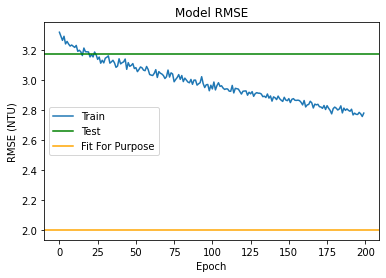

Could not save: plots\2022-05-10 22-41 Model Loss vs Epoch for predicting turbidity.png
Possibly change datetime


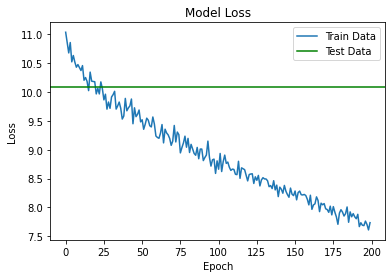

In [17]:
plt.plot(best_history.history['root_mean_squared_error'], label='Train')
plt.axhline(test_rmse, color='g', label='Test')
plt.axhline(ffp_rmse, color='orange', label='Fit For Purpose')
plt.title('Model RMSE')
plt.ylabel('RMSE (NTU)')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model RMSE vs Epoch for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

plt.plot(best_history.history['loss'], label='Train Data')
plt.axhline(test_loss, color='g', label='Test Data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model Loss vs Epoch for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

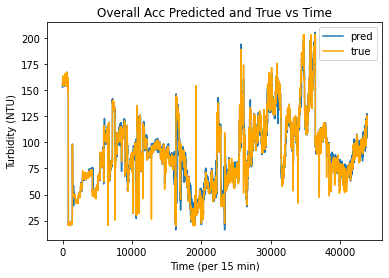

In [18]:
pred = best_model.predict(x_shaped)

plt.plot(pred, label='pred')
plt.plot(y_shaped, color='orange', label='true')
plt.title('Overall Acc Predicted and True vs Time')
plt.ylabel('Turbidity (NTU)')
plt.xlabel('Time (per 15 min)')
plt.legend()
fpath = os.path.join("plots", now + " Overall Acc Predicted and True vs Time for predicting turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()


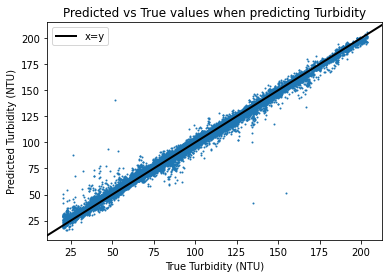

In [19]:
plt.scatter(y_shaped, pred, s=1)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, label="x=y", color='k', lw=2, scalex=False, scaley=False)
plt.title('Predicted vs True values when predicting Turbidity')
plt.xlabel('True Turbidity (NTU)')
plt.ylabel('Predicted Turbidity (NTU)')
plt.legend()
fpath = os.path.join("plots", now + " Predicted vs True values when predicting Turbidity" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()